# Are global warming trends occurring globally or only in certain areas?

# 1. Project One

## 1.1 Introduction
  How have the average temperatures changes varied over time across different areas and the entire surface of the Earth, including land and ocean? Does the Earth experience warming trends in only certain cities or countries or across the entire surface?

  In this project we will discuss and take a look with temperature data from Berkeley Earth, CO2 emissions from world Bank, and energy consummption from ourworldindata. These data records of the entire surface of the Earth, spanning thousands of cities and nearly all countries. These records include the average temperature, average temperature uncertainty, time, location, carbon emission, different type energy usage, and other relevant information. By analyzing these records, we can observe the changes in global and local temperatures over time and potential factor related it. This will give us a better understanding of how average temperature is changing globally and locally, providing an evidence of climate change.

  In first project we will focus on how the average temperatures, standard deviations, temperature changes, and maximum temperature changes have varied over time across different cities and the entire surface of the Earth, including land and ocean, we will be using the Y variables of average temperature, maximum temperature, standard deviation of temperature, and temperature. These variables will be analyzed against the X variables of location and years. Specifically, we will focus on the global land plus ocean and six cities, including Faisalabad, Shanghai, Lahore, Nanjing, Alexandria, and Chengdu. These locations were selected because they represent diverse geographic areas and have significant populations, making them highly relevant for examining local and global climate trends. Also these six cities have same latitude. By examining these factors in relation to location and time, we can better understand how climate is changing on a global scale, and whether the warming trends are occurring in certain cities.
  
  In the second project, we will analyze the y variables of temperature changes and potential factors like carbon emissions, energy generation, and fossil fuel consumption across the subgroup of X variables like different countries on different continents. This will help us understand how regions contribute to global climate change and identify potential strategies to address it. We will also investigate temperature changes and potential factors on a regional scale to identify the drivers of climate change and take steps towards mitigating its impacts.
  
  After analyzing the temperature records for the six selected cities and the global land and ocean, it has been found that the average temperature has increased by 1-2 degrees Celsius during the last two centuries. This indicates a global warming trend, which is a major concern for mitigating the effects of climate change. Based on the data analyzed in both projects, it is evident that almost every country across the globe is experiencing higher average temperatures than they did 1.5 centuries ago. This underscores the reality of global climate change and the urgent need for action to address its impacts.
  

## 1.2 Data loading and cleaning
In our research project on climate change, we needed to obtain data on average temperature, maximum temperature, standard deviation of temperature, and temperature over time for land, land plus ocean, and six cities: Faisalabad, Shanghai, Lahore, Nanjing, Alexandria, and Chengdu.

### Major Cities Temperature Data
We will first read the major city temperature data. It records the average temperature over month, city name, country, latitude, longitude, and average temperature uncertainty. Then we read global temperature data, and it records the land, land and ocean average temperature, average temperature uncertainty, maximum temperature over time.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Read data
file_path = "/Users/nick0o0o0/Library/Mobile Documents/com~apple~CloudDocs/gxyfile/third_year/ECO225/Project_Two/archive/"

country_temp = pd.read_csv(file_path + "GlobalLandTemperaturesByCountry.csv")
major_city_temp = pd.read_csv(file_path + "GlobalLandTemperaturesByMajorCity.csv")

global_temp = pd.read_csv(file_path + "GlobalTemperatures.csv")

### New Columns: Year, Month, NumLatitude, and Hemisphere for major city data
Now we will do data cleaning to create number version of Latitude in column NumLatitude and one string indicate which hemisphere it is in Hemisphere. With these column we will easy to find cities has similar latitude and esay to campare their data. We compare these data since they should have similar temperature as they has similar latitude. Also we will create new column called Year and Month to track the year and month seperatly. These two column are number so it is easy for us to slicing later on.

In [3]:
for row in major_city_temp.iterrows():
    index_value, column_value = row
    
    lati = column_value["Latitude"]
    time = column_value["dt"]

    if "N" in lati:
        major_city_temp.at[index_value, "Hemisphere"] = "N"
        major_city_temp.at[index_value, "NumLatitude"] = float(lati.replace("N",""))
        
    else:
        major_city_temp.at[index_value, "Hemisphere"] = "S"
        major_city_temp.at[index_value, "NumLatitude"] = float(lati.replace("S",""))
    
    major_city_temp.at[index_value, "Year"] = int(time[0:4])
    major_city_temp.at[index_value, "Month"] = int(time[5:7])


### Change datatype to int for Year, Month, and RoundLati
Next we create a column called RoundLati which is the rounded latitude for that city since it may difficult to find several cities has the same and precise latitude in this data. We use rounded function to have a integer for the Latitude. Change the datatype for Year, Month, and RoundLati to integer.

In [4]:
major_city_temp["RoundLati"] = round(major_city_temp["NumLatitude"])
major_city_temp["Year"] = major_city_temp["Year"].astype(int)
major_city_temp["Month"] = major_city_temp["Month"].astype(int)
major_city_temp["RoundLati"] = major_city_temp["RoundLati"].astype(int)


### Groupby city and year
Working on data over month may have too much data, so we want to get a aggregation with year. Next we use groupby method to get the average, standard deviation, maximum, and difference of temperature over each year of each city in major city data. This is useful when we want to compare data over year.

Below is the average temperature of each city of each year

In [5]:
major_copy = major_city_temp.copy()
MajorCity_year_average = major_copy.groupby(["City", "Year"]).mean()
MajorCity_year_average.rename(columns={"AverageTemperature": "YearAverageTemperature"}, inplace=True)


Below is the average temperature standanr deviation of each city of each year.

In [6]:
MajorCity_year_std = major_copy.groupby(["City", "Year"]).std()
MajorCity_year_std.rename(columns={"AverageTemperature": "YearAverageTemperatureStd"}, inplace=True)


Below is the maxmum temperature of each city of each year

In [7]:
MajorCity_year_Max = major_copy.groupby(["City", "Year"]).max()
MajorCity_year_Max.rename(columns={"AverageTemperature": "YearAverageTemperatureMax"}, inplace=True)


Below is the average temperature difference of each city of each year

In [8]:
Major3Col = major_copy[["City", "Year", "AverageTemperature"]]

Major3Col["AverageTemperature"].astype(float)

MajorCity_year_Dif = Major3Col.groupby(["City", "Year"]).max() - Major3Col.groupby(["City", "Year"]).min()
MajorCity_year_Dif.rename(columns={"AverageTemperature": "YearAverageTemperatureDifference"}, inplace=True)


### Cities with similar Latitude with Shanghai
Shanghai is my hometown, so I choose it and get a list of City with same latitude with it. Now the NumLatitude and Hemisphere are useful. First let's find the latitude of Shanghai. Then use locate a list of cities in the data tha has the similar latitude with Shanghai.

In [9]:
Shanghai_lati = major_city_temp.set_index("City").loc["Shanghai",["RoundLati", "Hemisphere"]]

In [10]:
SameLati_Shanghai = major_city_temp.set_index(["RoundLati", "Hemisphere"]).loc[31, "N"]["City"]

These will be useful for slicing for a pivot table later on. Since graph all cities temperature is hard to see the trend. We pick these cities because they have the same latitude.

In [11]:
SameLati_Shanghai = list(set(SameLati_Shanghai))

### Pivot Table of average, standard deviation,  maximum, and difference of temperature for major cities over year
We use cleaned data in 2.1.5 to track and create pivot table for average, standard deviation, max, and difference of temperature with city name as the columns and year as the index. These help us to only focus on city, year, and temperature.

#### Pivot Table of average temperature of major cities over years

In [12]:
NoIndex_majorAvg = MajorCity_year_average.reset_index()
YearTempPivotTable = NoIndex_majorAvg.pivot_table(values="YearAverageTemperature", index="Year", columns="City")

#### Pivot Table of standard deviation of temperature of major cities over years

In [13]:
NoIndex_majorAvg = MajorCity_year_std.reset_index()
YearTempStdPivotTable = NoIndex_majorAvg.pivot_table(values="YearAverageTemperatureStd", index="Year", columns="City")

#### Pivot Table of maximum of temperature of major cities over years

In [14]:
NoIndex_majorAvg = MajorCity_year_Max.reset_index()
YearTempMaxPivotTable = NoIndex_majorAvg.pivot_table(values="YearAverageTemperatureMax", index="Year", columns="City")

#### Pivot Table of temperature difference of major cities over years

In [15]:
NoIndex_majorAvg = MajorCity_year_Dif.reset_index()
YearTempDifPivotTable = NoIndex_majorAvg.pivot_table(values="YearAverageTemperatureDifference", index="Year", columns="City")

### Global temprature data
We will do data cleaning to global temperature too and create a new column called year to track which year of each row. We first do groupby year to get a average, standard deviationm, maximum temperature and temperature difference of land, ocean of earth over years.

In [16]:
for row in global_temp.iterrows():
    row_index, row_values = row
    global_temp.at[row_index, "Year"] = row_values["dt"][0:4]


#### Global average temperature group by years
Also create two columns called Land>=8.5 and LandOcean>=15.5 to indicate whether the average temperature of land is exceed 8.5 and average temperature of land and ocean exceed 15.5 that year. 

In [17]:
YearAverageGlobal = global_temp.groupby("Year").mean()
YearAverageGlobal.index = YearAverageGlobal.index.astype(int)

for row in YearAverageGlobal.iterrows():
    row_index, row_values = row
    LandAvg = row_values["LandAverageTemperature"]
    OceanLandAvg = row_values["LandAndOceanAverageTemperature"]
    
    if LandAvg >= 8.5:
        YearAverageGlobal.at[row_index, "Land>=8.5"] = 1
    else:
        YearAverageGlobal.at[row_index, "Land>=8.5"] = 0
        
    if OceanLandAvg >= 15.5:
        YearAverageGlobal.at[row_index, "LandOcean>=15.5"] = 1
    else:
        YearAverageGlobal.at[row_index, "LandOcean>=15.5"] = 0


#### Global average standard deviation temperature group by years

In [18]:
YearStdGlobal = global_temp.groupby("Year").std()
YearStdGlobal.index = YearStdGlobal.index.astype(int)

#### Global maximum temperature group by years
Also create two columns called Land>=20.5 and LandOcean>=17 to indicate whether the maximum temperature of land is exceed 20.5 and average temperature of land and ocean exceed 17 that year. 

In [19]:
YearMaxGlobal = global_temp.groupby("Year").max()
YearMaxGlobal.index = YearMaxGlobal.index.astype(int)

for row in YearMaxGlobal.iterrows():
    row_index, row_values = row
    LandAvg = row_values["LandMaxTemperature"]
    OceanLandAvg = row_values["LandAndOceanAverageTemperature"]
    
    if LandAvg >= 20.5:
        YearMaxGlobal.at[row_index, "Land>=20.5"] = 1
    else:
        YearMaxGlobal.at[row_index, "Land>=20.5"] = 0
        
    if OceanLandAvg >= 17:
        YearMaxGlobal.at[row_index, "LandOcean>=17"] = 1
    else:
        YearMaxGlobal.at[row_index, "LandOcean>=17"] = 0


#### Global difference temperature group by years

In [20]:
global_temp_copy = global_temp.drop(global_temp.columns[0], axis=1)
global_list = global_temp_copy.columns.to_list()
for col in global_list:
    global_temp_copy[col].astype(float)
    
YearDifGlobal = global_temp_copy.groupby("Year").max() - global_temp_copy.groupby("Year").min()
YearDifGlobal.index = YearDifGlobal.index.astype(int)

## 1.3 Summary Statistics Tables
Let's now summarize what we have accomplished and highlight which data is important. We have created four types of pivot tables for major cities and global temperature. These tables display the average, maximum, standard deviation, and difference of temperature changes over the years for Faisalabad, Shanghai, Lahore, Nanjing, Alexandria, and Chengdu or the global land and ocean. The average and maximum temperatures are useful and convenient for plotting. In the next section, we can analyze the temperature trend over the years by graphing these variables. The standard deviation of temperature and temperature difference changes over the years provide insights into the stability of the global or local temperature. If the standard deviation increases, it means the temperature for 12 months is becoming more dispersed, indicating that the weather in the same area is becoming more extreme. If the temperature difference increases, it means the difference between the lowest and highest monthly temperature is becoming greater. These variables can be used to study both the global and specific city temperatures.

Below is a summary of the data cleaning process that we have carried out.

### Data for selected cities

#### Pivot Table of average temperature of Faisalabad, Shanghai, Lahore, Nanjing, Alexandria, and Chengdu
Each cell in the dataset represents the average temperature of the corresponding city and year. The dataset is missing data for the year 2013. By analyzing the data, we can observe that Shanghai, Nanjing, Alexandria, and Chengdu have all experienced an increase in average temperature by 1-2 degrees Celsius when comparing the data from 1841 and 2012. These findings are consistent with global temperature trends, which have also shown an increase in average temperature over the last two centuries.

In [21]:
YearTempPivotTable[SameLati_Shanghai].dropna()

City    Chengdu  Alexandria     Lahore  Faisalabad   Shanghai    Nanjing
Year                                                                    
1841   9.833083   20.084750  24.031300   24.031300  14.869583  14.495167
1842  10.235167   19.919250  25.042111   25.042111  15.427667  15.060500
1843  10.327000   19.906000  23.713667   23.713667  15.528833  15.159917
1844  10.031167   19.766417  23.233500   23.233500  15.331583  14.980833
1845   9.963333   20.054500  23.485083   23.485083  15.426083  15.042500
...         ...         ...        ...         ...        ...        ...
2009  11.616583   21.670500  25.365750   25.365750  17.012000  16.631583
2010  11.368083   22.459583  25.477917   25.477917  16.748417  16.443083
2011  11.074333   21.181500  24.975250   24.975250  16.518000  16.218917
2012  11.159750   21.552583  24.869417   24.869417  16.474500  16.131000
2013  13.347000   21.438500  25.952625   25.952625  17.857625  17.884125

[161 rows x 6 columns]

#### Pivot Table of max temperature of Faisalabad, Shanghai, Lahore, Nanjing, Alexandria, and Chengdu
Each cell in the dataset corresponds to the maximum temperature recorded in the corresponding city and year. Upon analyzing the data, we observe that all cities, namely Faisalabad, Shanghai, Lahore, Nanjing, Alexandria, and Chengdu, have experienced an increase of 1-2 degrees Celsius in the average maximum temperature during the hottest month of the year, when comparing the years 1841 and 2012. This upward trend in maximum temperature over time is statistically significant and indicates a pattern of global warming.

In [22]:
YearTempMaxPivotTable[SameLati_Shanghai].dropna()

City  Chengdu  Alexandria  Lahore  Faisalabad  Shanghai  Nanjing
Year                                                            
1841   19.818      27.251  33.106      33.106    27.783   27.611
1842   18.574      25.545  31.870      31.870    27.013   26.575
1843   19.270      25.976  33.110      33.110    27.372   27.076
1844   18.933      26.115  32.916      32.916    27.434   27.030
1845   19.429      26.502  33.062      33.062    28.089   27.810
...       ...         ...     ...         ...       ...      ...
2009   19.945      27.663  34.687      34.687    28.560   28.440
2010   20.798      28.806  33.970      33.970    30.128   29.596
2011   20.359      27.637  34.134      34.134    29.253   28.622
2012   20.640      28.613  35.649      35.649    29.441   29.488
2013   21.264      27.453  34.456      34.456    30.623   30.459

[161 rows x 6 columns]

#### Pivot Table of temperature difference of Faisalabad, Shanghai, Lahore, Nanjing, Alexandria, and Chengdu
Every cell in the dataset corresponds to the average temperature difference of the corresponding city and year. Statistical analysis shows that Faisalabad, Shanghai, Lahore, and Nanjing have experienced an increase in temperature difference of about 1 degree Celsius when comparing 1841 and 2012. In contrast, Alexandria has experienced a decrease in temperature difference of about 1 degree Celsius during the same period. These findings indicate that the magnitude and direction of temperature changes can vary across different regions, and it is important to consider both local and global trends when examining the effects of climate change. 

In [23]:
YearTempDifPivotTable[SameLati_Shanghai].dropna()

City  Chengdu  Alexandria  Lahore  Faisalabad  Shanghai  Nanjing
Year                                                            
1841   20.554      13.530  21.935      21.935    25.974   26.474
1842   18.488      12.641  17.766      17.766    23.985   24.236
1843   18.529      11.393  20.716      20.716    23.548   23.962
1844   18.651      12.991  20.949      20.949    24.487   24.731
1845   20.323      13.214  21.473      21.473    24.893   25.672
...       ...         ...     ...         ...       ...      ...
2009   18.819      12.071  20.513      20.513    25.310   25.695
2010   19.248      12.547  22.160      22.160    25.493   25.390
2011   21.806      12.000  22.727      22.727    28.553   28.478
2012   20.474      15.153  23.636      23.636    25.566   26.320
2013   20.650      12.414  22.237      22.237    26.946   27.441

[161 rows x 6 columns]

#### Pivot Table of standard deviation temperature of Faisalabad, Shanghai, Lahore, Nanjing, Alexandria, and Chengdu
Every cell correpsond the standard deviation of temperature of corresponging city and corresponging year.It is important to note that while none of these cities showed a significant change in temperature variation between 1841 and 2012, this could still have important implications for climate change research. Specifically, changes in the standard deviation of temperature could indicate changes in weather patterns or increased frequency of extreme temperature events, both of which can have significant impacts on local ecosystems and human health. Therefore, even if the changes in standard deviation are not statistically significant, they should still be carefully monitored and analyzed for potential long-term effects.

In [24]:
YearTempStdPivotTable[SameLati_Shanghai].dropna()

City   Chengdu  Alexandria    Lahore  Faisalabad   Shanghai    Nanjing
Year                                                                  
1841  7.307309    5.003125  8.491180    8.491180   9.174271   9.353196
1842  6.633742    4.519192  6.291019    6.291019   8.503102   8.701414
1843  6.652217    4.224156  7.690557    7.690557   8.422991   8.612064
1844  6.815748    4.674841  7.934288    7.934288   8.780892   8.946557
1845  7.339130    4.594745  8.165247    8.165247   9.122108   9.359394
...        ...         ...       ...         ...        ...        ...
2009  6.808655    4.750174  7.721025    7.721025   9.052153   9.320440
2010  6.743076    4.408005  8.002191    8.002191   8.993962   9.032827
2011  7.335649    4.715810  7.898164    7.898164   9.438262   9.490297
2012  7.193872    5.491338  8.420840    8.420840   9.416179   9.711420
2013  7.596997    4.845030  8.838606    8.838606  10.520148  10.677467

[161 rows x 6 columns]

### Data for surface of the Earth

#### Pivot Table of average temperature of Global over years
Each cell in the dataset corresponds to the average temperature of the corresponding column over a given year. We have created two new binary columns, Land>=8.5 and LandOcean>=17, which indicate whether the average temperature of land is greater than or equal to 8.5 and whether the average temperature of land and ocean combined is greater than or equal to 17 for each year, respectively. Our analysis shows that both the LandAverageTemperature and LandAndOceanAverageTemperature have increased by approximately 2 degrees Celsius between 1850 and 2015. This increase is indicates a global warming trend. The binary columns also reveal that the frequency of years with average temperatures above these thresholds has increased over time, suggesting that the warming trend is becoming more severe.

In [25]:
YearAverageGlobal[["LandAverageTemperature", "LandAndOceanAverageTemperature","Land>=8.5", "LandOcean>=15.5"]].dropna()

LandAverageTemperature  LandAndOceanAverageTemperature  Land>=8.5  \
Year                                                                      
1850                7.900667                       14.867167        0.0   
1851                8.178583                       14.991833        0.0   
1852                8.100167                       15.006500        0.0   
1853                8.041833                       14.955167        0.0   
1854                8.210500                       14.991000        0.0   
...                      ...                             ...        ...   
2011                9.516000                       15.769500        1.0   
2012                9.507333                       15.802333        1.0   
2013                9.606500                       15.854417        1.0   
2014                9.570667                       15.913000        1.0   
2015                9.831000                       16.058583        1.0   

      LandOcean>=15.5  
Year                   
1850              0.0  
1851              0.0  
1852              0.0  
1853              0.0  
1854              0.0  
...               ...  
2011              1.0  
2012              1.0  
2013              1.0  
2014              1.0  
2015              1.0  

[166 rows x 4 columns]

#### Pivot Table of maximum temperature of Global over years
Each cell in the dataset represents the maximum of month average temperature of the corresponding column over the years. The analysis shows that both the maximum temperature of land and land plus ocean has increased by 1 degree Celsius when comparing the temperatures from 1850 to 2015. This increase in temperature is significant and highlights the trend of global warming over the past century. These findings reinforce the evidence of globale warming.

In [26]:
YearMaxGlobal[["LandAverageTemperature", "LandAndOceanAverageTemperature"]].dropna()

LandAverageTemperature  LandAndOceanAverageTemperature
Year                                                        
1850                  14.492                          16.783
1851                  14.531                          16.831
1852                  14.512                          16.984
1853                  14.645                          16.999
1854                  14.692                          16.775
...                      ...                             ...
2011                  15.482                          17.568
2012                  15.076                          17.450
2013                  15.003                          17.503
2014                  14.875                          17.607
2015                  15.051                          17.611

[166 rows x 2 columns]

#### Pivot Table of temperature difference of Global over years
The temperature difference between the coldest and hottest month is an important indicator of the temperature variability throughout the year. The data shows that the land temperature difference has decreased by 2 degrees Celsius between 1850 and 2015. This indicates a more stable temperature range throughout the year. The decrease in temperature difference for the land plus ocean column is less pronounced but still shows a slight decrease. This could be an indication of a shift towards a more stable climate in recent years. However, it's important to note that these changes are still within the natural variability of the climate and may not necessarily indicate a long-term trend. Further analysis is needed to determine the significance of these changes.

In [27]:
YearDifGlobal[["LandAverageTemperature", "LandAndOceanAverageTemperature"]].dropna()

LandAverageTemperature  LandAndOceanAverageTemperature
Year                                                        
1850                  13.743                           3.950
1851                  12.100                           3.586
1852                  12.136                           3.753
1853                  12.859                           3.856
1854                  13.411                           3.792
...                      ...                             ...
2011                  12.200                           3.640
2012                  11.919                           3.591
2013                  11.318                           3.386
2014                  11.375                           3.471
2015                  11.170                           3.356

[166 rows x 2 columns]

#### Pivot Table of standard deviation temperature of Global over years
The standard deviation of temperature measures the variability of temperature within each column over time. In this dataset, we observe that the standard deviation of temperature for both land and land plus ocean did not change significantly between 1850 and 2015. This means that the spread of temperature values around the mean remained relatively stable over time, suggesting that there was no significant shift in the overall variability of temperature on land or land plus ocean globally. However, it is important to note that local regions may have experienced different levels of variability, and further analysis could be conducted to explore these regional differences in more detail.

In [28]:
YearStdGlobal[["LandAverageTemperature", "LandAndOceanAverageTemperature"]].dropna()

LandAverageTemperature  LandAndOceanAverageTemperature
Year                                                        
1850                4.726851                        1.369906
1851                4.652832                        1.339856
1852                4.553437                        1.386375
1853                4.824691                        1.416618
1854                4.728180                        1.374594
...                      ...                             ...
2011                4.497240                        1.343160
2012                4.549403                        1.355500
2013                4.306305                        1.274133
2014                4.396015                        1.331519
2015                4.120330                        1.229084

[166 rows x 2 columns]

### Summary
In conclusion, the analysis of the temperature dataset reveals consistent evidence of global warming over the past century. The increase in average and maximum temperatures, as well as the decrease in temperature difference, suggests a shift towards a more stable climate. However, the standard deviation of temperature remained relatively stable, indicating that the spread of temperature values around the mean did not change significantly. The findings also highlight the importance of considering both global and local trends when examining the effects of climate change. Further analysis is needed to determine the significance of these changes and their potential long-term impacts.

## 1.4 Plots and Figures


### Climate change of six cities with the same latitude
This subsecton is temperature trend in Alexandria, Chengdu, Lahore, Faisalabad, Shanghai, and Nanjing. These cities has almost same latitude in the earth. 

#### Average temperature changes over year
The graph illustrates the trend of average temperature in six cities: Alexandria, Chengdu, Lahore, Faisalabad, Shanghai, and Nanjing over the past two centuries. Each dot on the graph represents the average temperature of a given year in the respective city.

From the graph, it is evident that the average temperature of all six cities has risen by 1-2°C over the last two centuries, with a noticeable upward trend. This suggests a gradual warming of the climate in these regions over time. However, it is important to note that the data for the year 2013 is incomplete and should be disregarded.

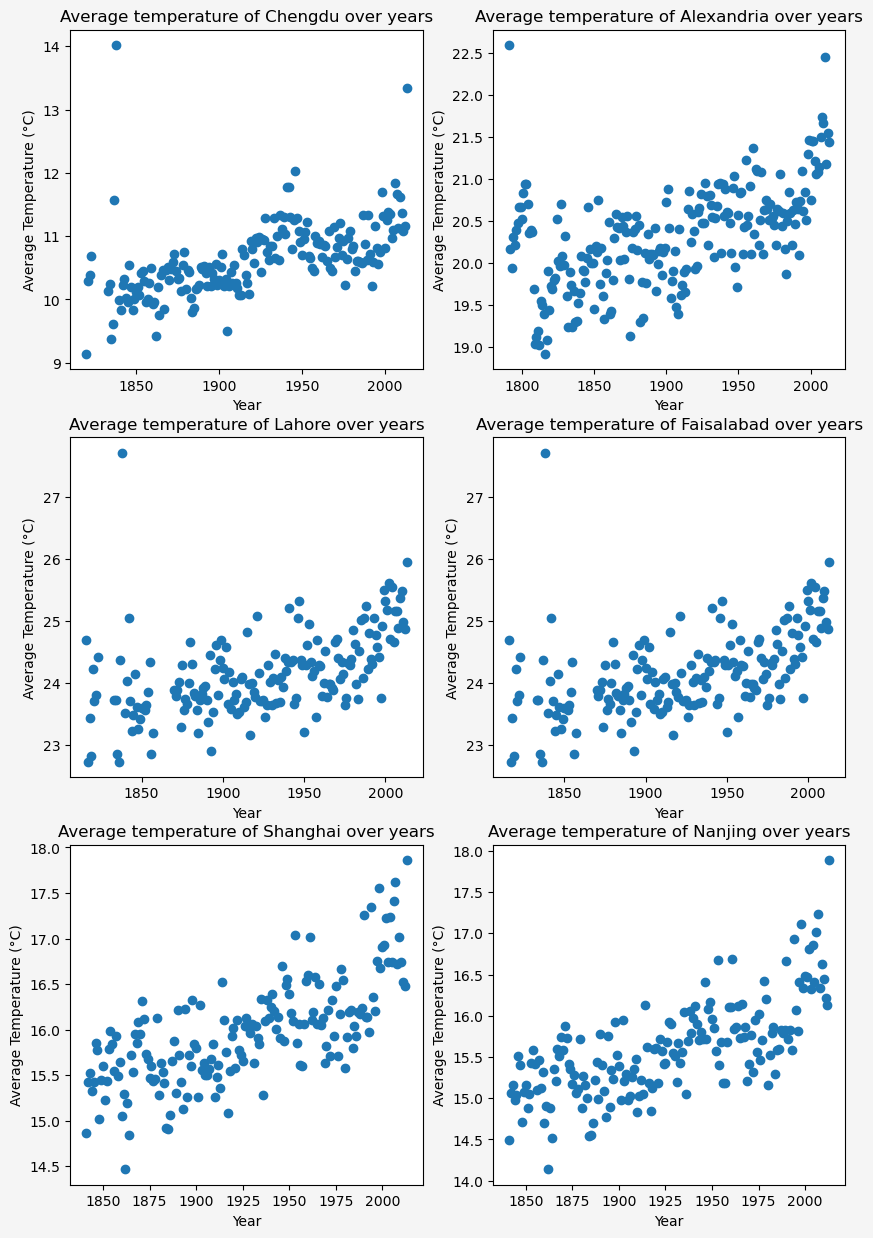

In [29]:
fig, ax = plt.subplots(3, 2, figsize=(10, 15))
SameLatiArray = np.array(SameLati_Shanghai).reshape(3, 2)
fig.set_facecolor((0.96, 0.96, 0.96))

for i in range(3):
    for j in range(2):
        
        ax[i, j].scatter(x=YearTempPivotTable.index, y=YearTempPivotTable[SameLatiArray[i, j]], )
        ax[i, j].set_title("Average temperature of "+ SameLatiArray[i, j] +" over years")
        ax[i, j].set_xlabel("Year")
        ax[i, j].set_ylabel("Average Temperature (°C)")

#### Maximum temperature changes over year
The graph presents the trend of maximum temperature in the previously mentioned cities, with each dot representing the maximum temperature recorded over twelve months in a given year. The cities considered are Lahore, Faisalabad, Shanghai, Nanjing, Chengdu, and Alexandria.

The data reveals that Lahore and Faisalabad have experienced an upward trend in their maximum temperature, with an increase of 1-2°C over the past two centuries. This trend is consistent with the overall trend of climate change observed globally. In contrast, the maximum temperature in Shanghai and Nanjing varies significantly, making it challenging to determine a clear trend. Chengdu shows a slight upward trend in its maximum temperature over time.

Furthermore, the data shows that Alexandria experienced a sharp increase of 2°C in its maximum temperature between 1975 and 2020. This trend is alarming, and it indicates the increasing severity of climate change and its consequences on local and global scales.

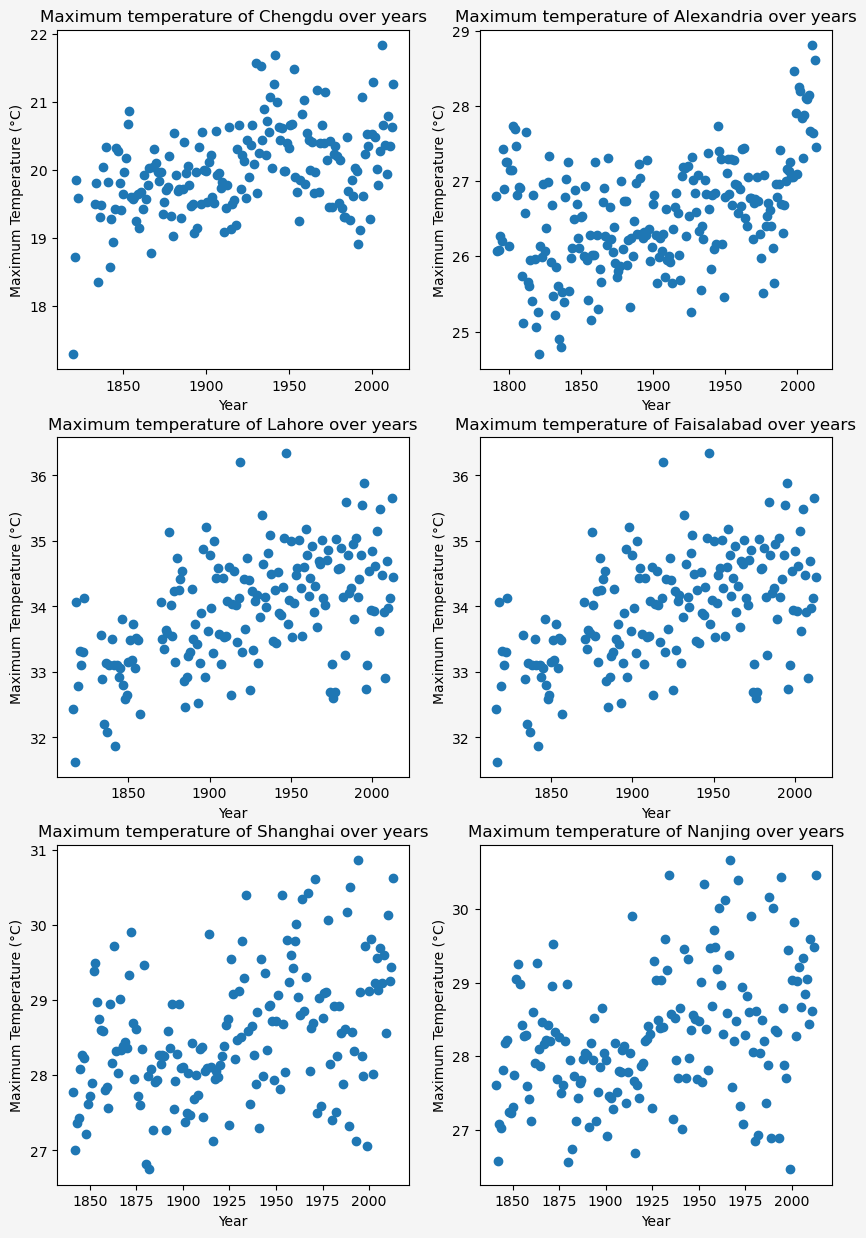

In [30]:
datapicked = YearTempMaxPivotTable
fig, ax = plt.subplots(3, 2, figsize=(10, 15))
SameLatiArray = np.array(SameLati_Shanghai).reshape(3, 2)
fig.set_facecolor((0.96, 0.96, 0.96))

for i in range(3):
    for j in range(2):
        
        ax[i, j].scatter(x=datapicked.index, y=datapicked[SameLatiArray[i, j]], )
        ax[i, j].set_title("Maximum temperature of "+ SameLatiArray[i, j] +" over years")
        ax[i, j].set_xlabel("Year")
        ax[i, j].set_ylabel("Maximum Temperature (°C)")

#### Standand deviation of temperature changes over year
The graph depicts the trend of temperature standard deviation in the cities mentioned earlier. Each dot on the graph represents the standard deviation of temperature recorded over twelve months in a given year. A higher standard deviation indicates greater variability in temperature over time.

The data shows that none of the cities exhibit a significant upward or downward trend in temperature standard deviation over time. Lahore and Faisalabad have a relatively stable standard deviation compared to the other cities. This stability implies that the climate in these cities has been relatively consistent over the years.

An increase in temperature standard deviation indicates greater variability in temperature, which could potentially result in more extreme weather events such as heatwaves, cold spells, and storms. However, the standard deviation of temperature in the considered cities appears to be relatively stable over time.

Overall, this graph suggests that while there is no significant trend in temperature standard deviation in these cities.

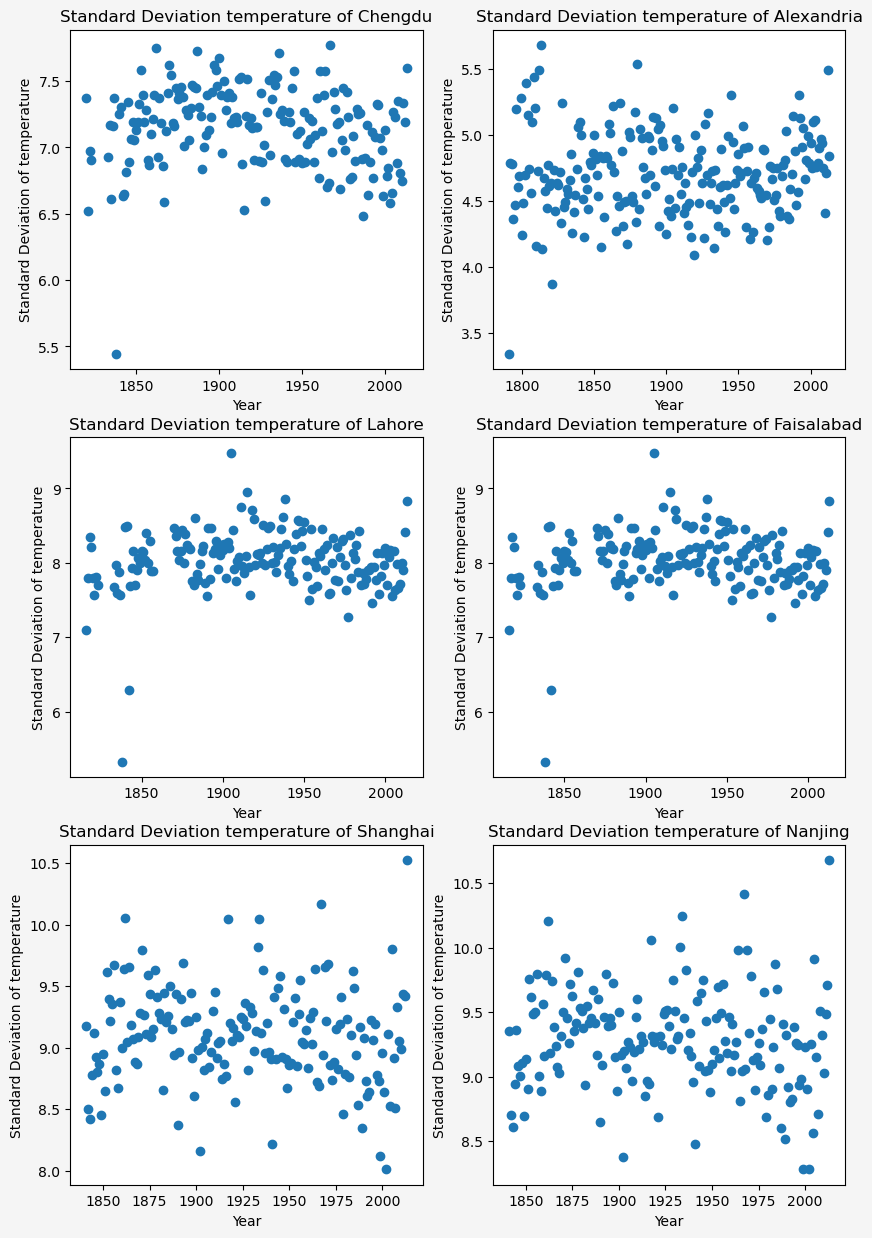

In [31]:
datapicked = YearTempStdPivotTable
fig, ax = plt.subplots(3, 2, figsize=(10, 15))
SameLatiArray = np.array(SameLati_Shanghai).reshape(3, 2)
fig.set_facecolor((0.96, 0.96, 0.96))

for i in range(3):
    for j in range(2):
        
        ax[i, j].scatter(x=datapicked.index, y=datapicked[SameLatiArray[i, j]], )
        ax[i, j].set_title("Standard Deviation temperature of "+ SameLatiArray[i, j])
        ax[i, j].set_xlabel("Year")
        ax[i, j].set_ylabel("Standard Deviation of temperature")

#### Temperature difference changes over year
The graph illustrates the trend of temperature difference in the cities mentioned earlier. Each dot represents the temperature difference calculated as the difference between the average temperature of the highest and lowest month in a given year.

The data indicates that, similar to temperature standard deviation, the temperature difference in these cities remains relatively stable over time. There is no significant upward or downward trend in temperature difference, suggesting that the climate in these cities has been relatively consistent over time.

A stable temperature difference indicates that the seasonal variation in temperature in these cities has remained consistent over time. This consistency could have significant implications for agriculture, as it provides some degree of predictability regarding crop growth and harvest cycles.

In conclusion, this graph highlights the importance of continuing to monitor and analyze climate data to understand the impact of climate change on our planet. While temperature difference in these cities remains relatively stable, other indicators such as rising temperatures and changes in precipitation patterns could still have significant consequences for the environment and society. 

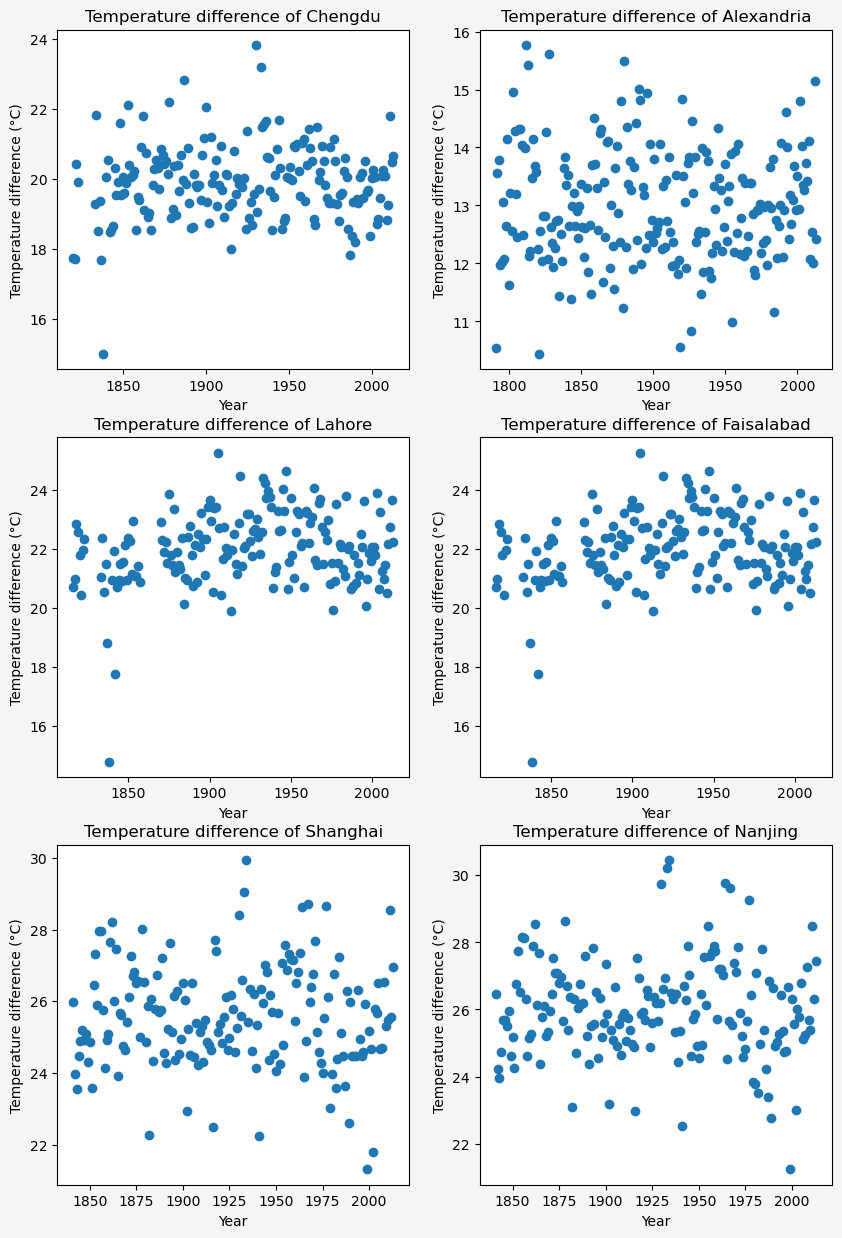

In [32]:
datapicked = YearTempDifPivotTable
fig, ax = plt.subplots(3, 2, figsize=(10, 15))
SameLatiArray = np.array(SameLati_Shanghai).reshape(3, 2)
fig.set_facecolor((0.96, 0.96, 0.96))

for i in range(3):
    for j in range(2):
        
        ax[i, j].scatter(x=datapicked.index, y=datapicked[SameLatiArray[i, j]], )
        ax[i, j].set_title("Temperature difference of "+ SameLatiArray[i, j])
        ax[i, j].set_xlabel("Year")
        ax[i, j].set_ylabel("Temperature difference (°C)")

### Global Climate change
In this subsection we will talk about temperature change globbally. It reflect climate changes of all land and all land plus ocean over year.

#### Average temperature change of land and land plus ocean
A clear and precise statement about global warming is crucial for understanding its impact on our planet. It is observed that the average temperature of both land and ocean has been consistently rising. Over the past 250 years, the average temperature of land has increased by nearly 2°C, while the average temperature of land and ocean combined has increased by approximately 1°C over the last 200 years. Furthermore, the pace of the increase appears to be accelerating.

Text(0.5, 1.0, 'Average temperature of ocean and land of earth over years')

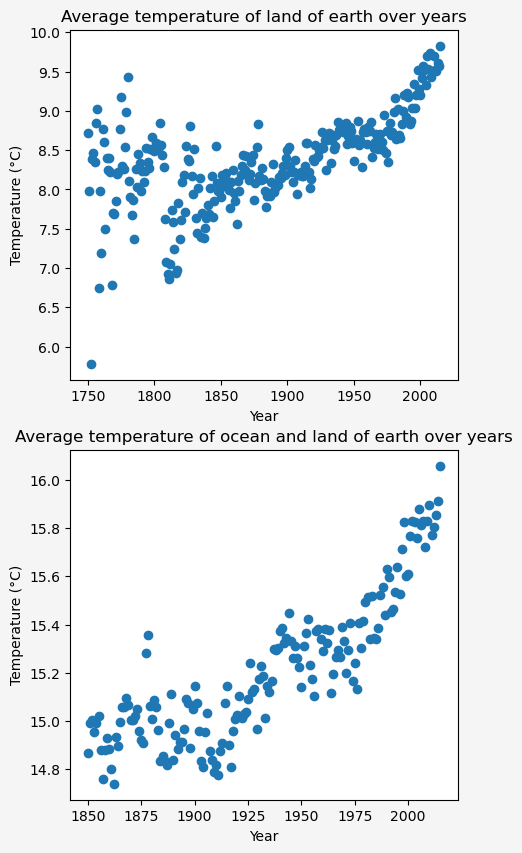

In [33]:
datapicked = YearAverageGlobal
column_picked = ["LandAverageTemperature", "LandAndOceanAverageTemperature"]
fig, ax = plt.subplots(2, 1, figsize=(5,10))

fig.set_facecolor((0.96, 0.96, 0.96))

for i in range(2):        
    ax[i].scatter(x=datapicked.index, y=datapicked[column_picked[i]])
    ax[i].set_xlabel("Year")
    ax[i].set_ylabel("Temperature (°C)")
    
ax[0].set_title("Average temperature of land of earth over years")
ax[1].set_title("Average temperature of ocean and land of earth over years")

#### Maximum temperature change of land and land plus ocean
The data clearly shows that global warming is impacting the maximum temperature of our planet, with both land and ocean experiencing an upward trend in temperature. Over the last three decades, the maximum temperature of land has increased by 1°C, indicating a rapid rate of change. Meanwhile, the maximum temperature of land plus ocean has increased by 1°C over the last two centuries, representing a more gradual but steady increase.

Text(0.5, 1.0, 'Maximum temperature of ocean and land of earth over years')

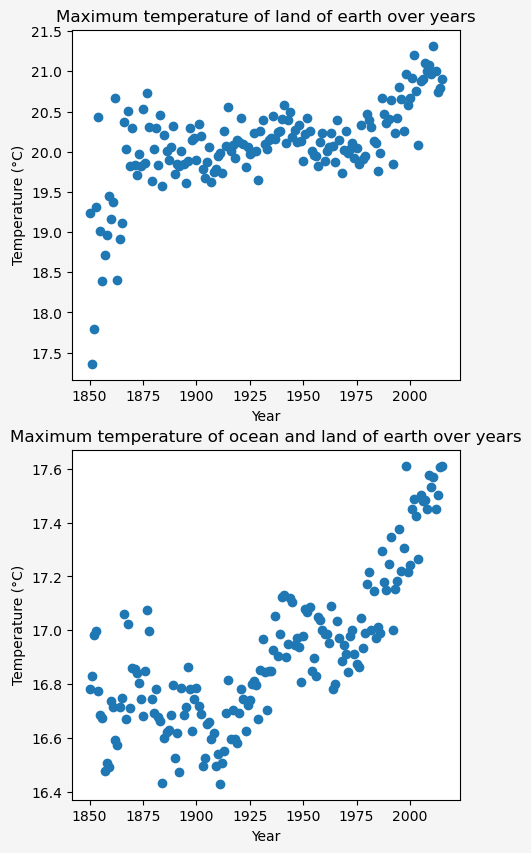

In [34]:
datapicked = YearMaxGlobal
column_picked = ["LandMaxTemperature", "LandAndOceanAverageTemperature"]
fig, ax = plt.subplots(2, 1, figsize=(5,10))

fig.set_facecolor((0.96, 0.96, 0.96))

for i in range(2):        
    ax[i].scatter(x=datapicked.index, y=datapicked[column_picked[i]])
    ax[i].set_xlabel("Year")
    ax[i].set_ylabel("Temperature (°C)")
    
ax[0].set_title("Maximum temperature of land of earth over years")
ax[1].set_title("Maximum temperature of ocean and land of earth over years")

#### Temperature difference change of land and land plus ocean
The temperature difference is a measure of the variation between the average temperatures of the hottest and coldest months in a given location. It is an important indicator of the overall climate conditions in a region. Both on land and in the ocean, the temperature difference has been experiencing a gradual decrease over the years. This implies that the coldest months are not as cold as they used to be in the past.

This trend can be attributed to several factors, including climate change and global warming. The rise in global temperatures has led to a decrease in temperature differences, as the warmer months are becoming even warmer while the colder months are becoming less cold. As a result, regions that once experienced distinct seasons with significant temperature differences are now experiencing milder, more uniform climates.

At the same time, the average global temperature has been on a steady rise, indicating a clear warming trend. 

Text(0.5, 1.0, 'Temperature difference of ocean and land of earth over years')

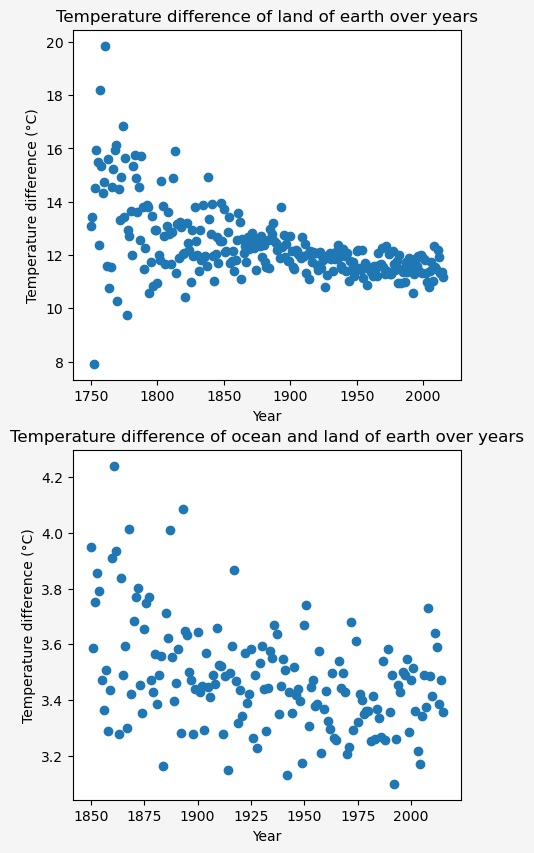

In [35]:
datapicked = YearDifGlobal
column_picked = ["LandAverageTemperature", "LandAndOceanAverageTemperature"]
fig, ax = plt.subplots(2, 1, figsize=(5, 10))

fig.set_facecolor((0.96, 0.96, 0.96))

for i in range(2):        
    ax[i].scatter(x=datapicked.index, y=datapicked[column_picked[i]])
    ax[i].set_xlabel("Year")
    ax[i].set_ylabel("Temperature difference (°C)")
    
ax[0].set_title("Temperature difference of land of earth over years")
ax[1].set_title("Temperature difference of ocean and land of earth over years")

#### Standard deviation of temperature land and land plus ocean
In the case of temperature, the standard deviation can provide insights into the consistency or variability of temperatures over a certain period, such as 12 months.

In this context, the standard deviation of temperature can help us understand how the average temperature of land and land plus ocean varies from the mean temperature over the course of a year. Interestingly, recent studies have shown that there is a slight downward trend in the standard deviation of both land and land plus ocean temperatures, which suggests that temperatures are becoming more consistent and closer to the mean.

However, this trend should not be confused with a decrease in the average temperature itself, as it is actually increasing. In fact, there is an upward trend in the global average temperature, which indicates that even the coldest month of the year is experiencing slightly warmer temperatures that are closer to the overall mean temperature.

Text(0.5, 1.0, 'Standard Deviation of temperature ocean and land of earth over years')

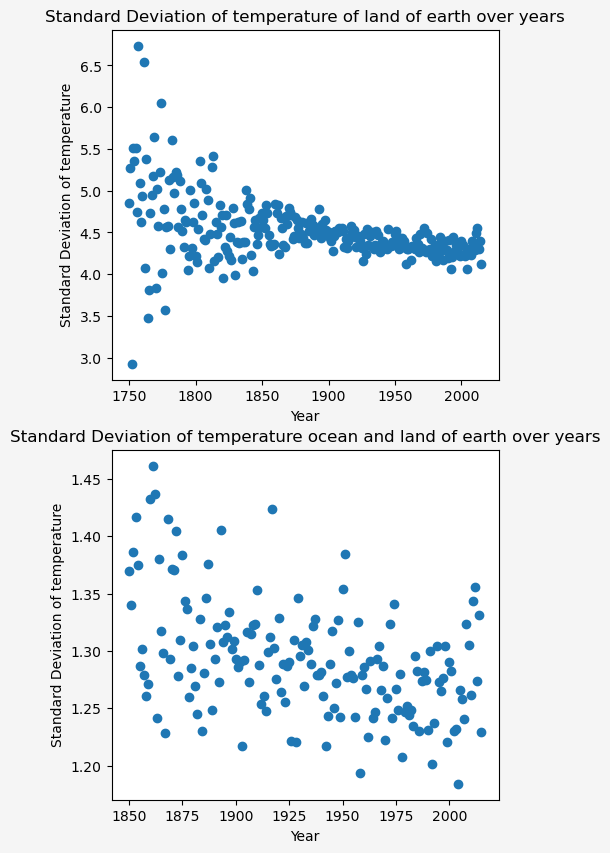

In [36]:
datapicked = YearStdGlobal
column_picked = ["LandAverageTemperature", "LandAndOceanAverageTemperature"]
fig, ax = plt.subplots(2, 1, figsize=(5, 10))

fig.set_facecolor((0.96, 0.96, 0.96))

for i in range(2):        
    ax[i].scatter(x=datapicked.index, y=datapicked[column_picked[i]])
    ax[i].set_xlabel("Year")
    ax[i].set_ylabel("Standard Deviation of temperature")
    
ax[0].set_title("Standard Deviation of temperature of land of earth over years")
ax[1].set_title("Standard Deviation of temperature ocean and land of earth over years")

#### Count how many years that the average temperature of land exceed 8.5 °C
There is a clear and concerning trend in the average temperature of land over time. Historical data reveals that from 1850 to 1870, there were no years with average temperatures exceeding 8.5°C. However, this changed dramatically in the following years as the number of years with such temperatures increased.

In recent times, the situation has become even more alarming. Between 1950 and 1990, and again from 1990 to 2010, every year recorded average land temperatures exceeding 8.5°C. This consistent rise in temperature is a significant cause for concern, and it highlights the urgency with which we must address the issue of climate change.

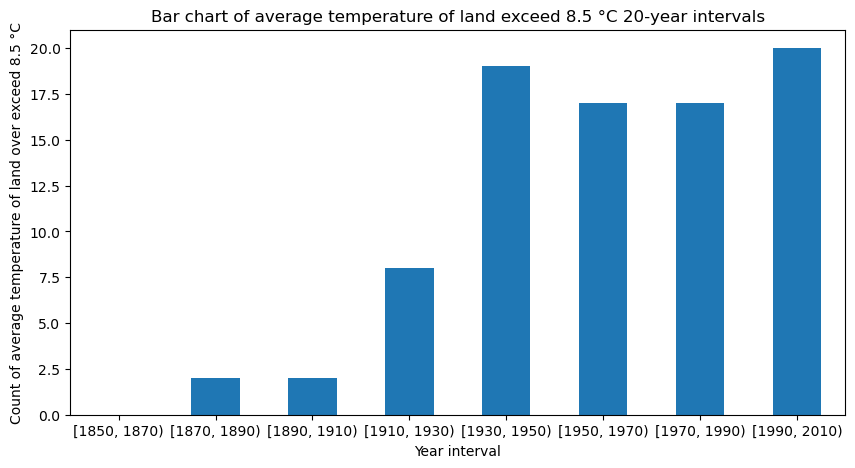

In [37]:
df = YearAverageGlobal


df['Year_bin'] = pd.cut(df.index, bins=range(1850, 2015, 20), right=False)
binned_data = df.groupby('Year_bin')['Land>=8.5'].sum()

plt.figure(figsize=(10,5))
binned_data.plot.bar(x='Year_bin', y='Land>=8.5', rot=0)
plt.xlabel('Year interval')
plt.ylabel('Count of average temperature of land over exceed 8.5 °C')
plt.title('Bar chart of average temperature of land exceed 8.5 °C 20-year intervals')
plt.show()

#### Count how many years that the average temperature of land plus ocean exceed 15.5 °C
It is evident from the data that there has been a significant increase in the average temperature of land and ocean over the last century. Between 1850 and 1970, there were no instances where the average temperature surpassed the 15.5°C threshold. However, this trend shifted during the period from 1970 to 1990, where only three years saw the temperature exceed the limit. This limited increase during the two decades is probably due to the early environmental regulations implemented by countries worldwide.

However, the subsequent two decades (1990-2010) witnessed a massive surge in global temperatures. There were 18 years during this time where the average temperature of land and ocean was recorded above the 15.5°C threshold. Such a significant and unprecedented increase in temperature can be attributed to the increasing levels of carbon dioxide and other greenhouse gases in the atmosphere, which trap heat and contribute to global warming.

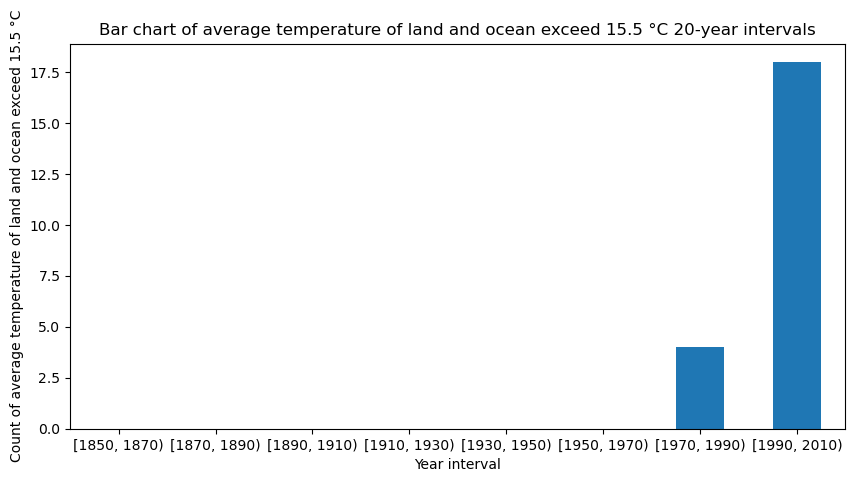

In [38]:
df = YearAverageGlobal


df['Year_bin'] = pd.cut(df.index, bins=range(1850, 2015, 20), right=False)
binned_data = df.groupby('Year_bin')['LandOcean>=15.5'].sum()

plt.figure(figsize=(10,5))
binned_data.plot.bar(x='Year_bin', y='LandOcean>=15.5', rot=0)
plt.xlabel('Year interval')
plt.ylabel('Count of average temperature of land and ocean exceed 15.5 °C')
plt.title('Bar chart of average temperature of land and ocean exceed 15.5 °C 20-year intervals')
plt.show()

#### Count how many years that the maximum temperature of land exceed 20.5 °C
Between 1850 and 1990, the maximum land temperature exceeding 20.5°C was a rare occurrence, with only 0 to 2 years experiencing such high temperatures in each 20-year interval. However, in the interval between 1990 and 2010, the trend shifted dramatically. During this period, the number of years with a maximum temperature above 20.5°C surged, with 14 years experiencing such high temperatures.

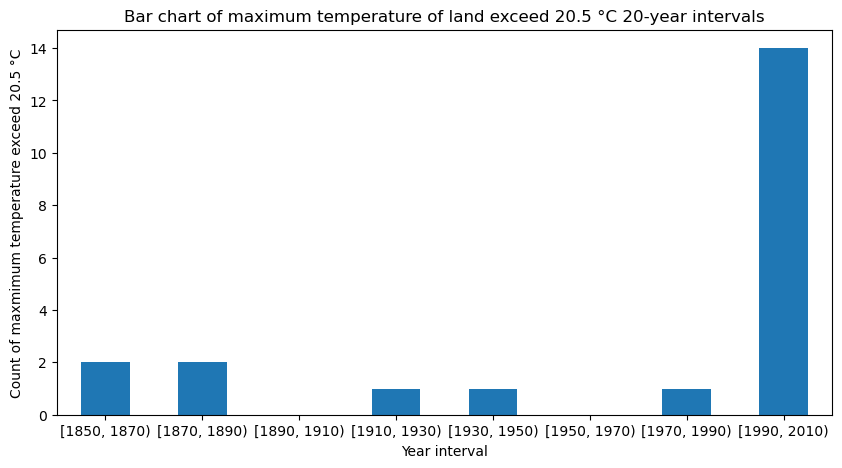

In [39]:
df = YearMaxGlobal

df['Year_bin'] = pd.cut(df.index, bins=range(1850, 2015, 20), right=False)
binned_data = df.groupby('Year_bin')['Land>=20.5'].sum()

plt.figure(figsize=(10,5))
binned_data.plot.bar(x='Year_bin', y='Land>=20.5', rot=0)
plt.xlabel('Year interval')
plt.ylabel('Count of maxmimum temperature exceed 20.5 °C')
plt.title('Bar chart of maximum temperature of land exceed 20.5 °C 20-year intervals')
plt.show()

#### Count how many years that the maximum temperature of land exceed 17 °C
Analysis of historical temperature data reveals that there has been a significant change in global temperature patterns over the past century. Between the years 1850 and 1930, there were typically no more than two years in any 20-year period where the maximum temperature of both land and ocean surfaces exceeded 17°C. However, since 1930, there has been a clear upward trend in global temperatures.

From 1930 to 1990, the number of years where the maximum temperature exceeded 17°C increased significantly. On average, there were 7.5 such years in each 20-year interval during this period. This trend continued into the 1990s, and between 1990 and 2010, every single year saw temperatures exceeding 17°C for both land and ocean surfaces. This trend suggests a continuing pattern of global warming that has accelerated in recent decades.

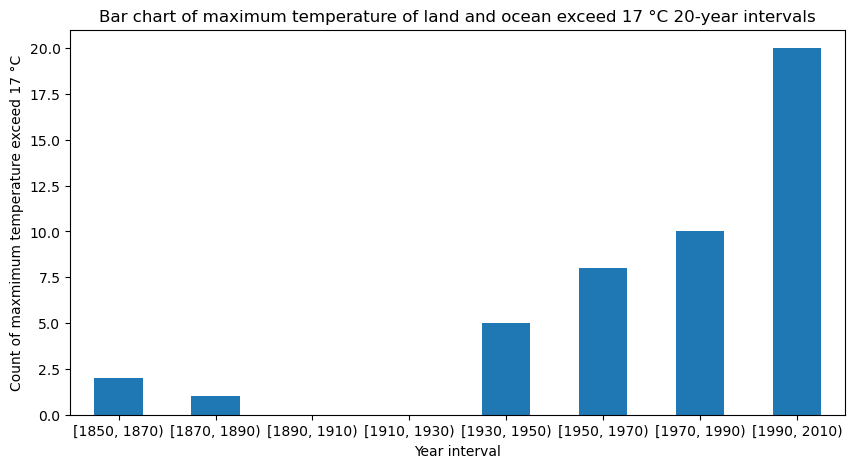

In [40]:
df = YearMaxGlobal

df['Year_bin'] = pd.cut(df.index, bins=range(1850, 2015, 20), right=False)
binned_data = df.groupby('Year_bin')['LandOcean>=17'].sum()

plt.figure(figsize=(10,5))
binned_data.plot.bar(x='Year_bin', y='LandOcean>=17', rot=0)
plt.xlabel('Year interval')
plt.ylabel('Count of maxmimum temperature exceed 17 °C')
plt.title('Bar chart of maximum temperature of land and ocean exceed 17 °C 20-year intervals')
plt.show()

### Summary 
These plots shows strong evidence of rising temperatures not only in specific cities, but also globally. The six cities located near 31N latitude all display an apparent increasing trend, with an average increase of 1-2°C over the last two centuries. The stability of the climate, reflected by the standard deviation and temperature difference, remains relatively unchanged over time, indicating that the temperature across these six cities is relatively stable across 12 months. Additionally, the average temperature of land and land plus ocean has risen approximately 1°C and 2°C, respectively, over the last two centuries, with a noticeable acceleration in the trend over the last 60 years. The maximum temperature for both land and land plus ocean also follows a similar trend to their average temperature. The standard deviation and temperature difference for both land and land plus ocean display a slight decreasing trend, indicating a less discrete global average temperature over the 12 months, with the coldest month being less cold than in the past. A comparison of average and maximum temperatures for both land and land plus ocean reveals an increase in the frequency of temperatures exceeding 8.5°C for land, 15.5°C for land plus ocean, 20.5°C for land, and 17°C for land plus ocean in the last century. All of these observations provide strong evidence that global warming is a real phenomenon.

# 2. Project Two

## 2.1 The Message
The main question surrounding global warming is whether the observed trends are occurring globally or only in certain areas. While studying the temperature of six cities and the global average, it was concluded that temperatures are rising by 1-2 degrees Celsius. However, this study alone may not be sufficient to draw any definitive conclusions. To gain a better understanding of whether temperature changes are happening uniformly across the globe, the next step would be instead of studying the average and maximum temperature globally changes over year (Y variables), it will be subgrouped by different continents and countries. This approach would allow for a better understanding of whether all locations are experiencing an increasing trend in temperature or if there are certain areas that are being affected more severely.

To gain a better understanding of global temperature trends, we will create several different line graphs that show how the average temperature of hottest month and average temperature of year of different countries changes over time within the same continent in the same graph. In order to make comparisons between different locations more meaningful, we will group together countries with similar average temperatures within the same graph. Additionally, we will average the temperature data for each continent using the individual country data and plot all continent trends in one graph. This will provide a more comprehensive overview of global temperature trends and allow for the identification of any significant patterns or anomalies. By using this approach, we hope to gain a more thorough understanding of the global temperature trends and their distribution across different regions.

In [41]:
import geopandas as gpd
from shapely.geometry import Point
from country_converter import CountryConverter
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

In [42]:
country_temp_copy = country_temp.copy()
country_temp_copy["dt"] = country_temp_copy["dt"].astype(str)
for row in country_temp_copy.iterrows():
    index_value, column_value = row
    
    time = column_value["dt"]
    
    country_temp_copy.at[index_value, "Year"] = int(time[0:4])

In [43]:
year_country_temp = country_temp_copy

In [44]:
import pandas as pd
import pycountry_convert as pc

df = year_country_temp

def get_continent(row):
    try:
        country_code = pc.country_name_to_country_alpha2(row['Country'])
        continent_code = pc.country_alpha2_to_continent_code(country_code)
        return continent_code
    except KeyError:
        return None

df['continent'] = df.apply(get_continent, axis=1)
year_country_temp = df

In [45]:
avg_year_country_temp = year_country_temp.groupby(["Country", "Year", "continent"]).mean()

In [46]:
max_year_country_temp = year_country_temp.groupby(["Country", "Year", "continent"]).max()

In [47]:
avg_year_country_temp.reset_index(inplace=True)
max_year_country_temp.reset_index(inplace=True)
x = set(year_country_temp["continent"])

In [48]:
avg_year_country_temp.set_index("continent", inplace=True)
max_year_country_temp.set_index("continent", inplace=True)

In [49]:
def plot_function(df, kind, continent):
    temp_by_country = df.groupby('Country')['AverageTemperature'].mean()
    df = df.merge(temp_by_country, on='Country', suffixes=('', '_avg'))
    df = df.sort_values('AverageTemperature_avg')
    countries = df['Country'].unique() 
    
    for i, ax in enumerate(axs.flatten()): 
        if i >= len(countries): 
            break
        start = i * 5 
        end = min((i + 1) * 5, len(countries)) 
        chunk = countries[start:end] 
        data = df[df['Country'].isin(chunk)] 
        pivoted_data = pd.pivot_table(data, values='AverageTemperature', index='Year', columns='Country')
        pivoted_data.iloc[::5, :].plot(ax=ax, kind='line', linewidth=1, markersize=5) 
        ax.set_title(f'Countries {start+1}-{end}') 
        ax.set_xlabel('Year') 
        ax.set_ylabel('Temperature (C)') 
        ax.set_xlim(1850, 2015)
        min_temp = pivoted_data.loc[pivoted_data.index >= 1870].min().min()
        max_temp = pivoted_data.loc[pivoted_data.index <= 2015].max().max()
        ax.set_ylim(min_temp, max_temp)

    df = df.drop('AverageTemperature_avg', axis=1)
    plt.suptitle(kind + ' Temperature Trends by Country in ' + continent) 
    plt.tight_layout() 
    plt.show()

### Avearage and Hottest month temperature trend in North America
The graph showing the average temperature of countries in North America from 1850 to 2015 reveals a significant trend of increasing temperatures over time. The data collected every five years indicates that the temperature of all countries in North America has increased by approximately 2 degrees Celsius during this time period. This finding is consistent with global temperature trends and supports the idea that climate change is happening and affecting regions around the world, including North America. The data presented in this graph could be used to further investigate the causes and consequences of rising temperatures in North America

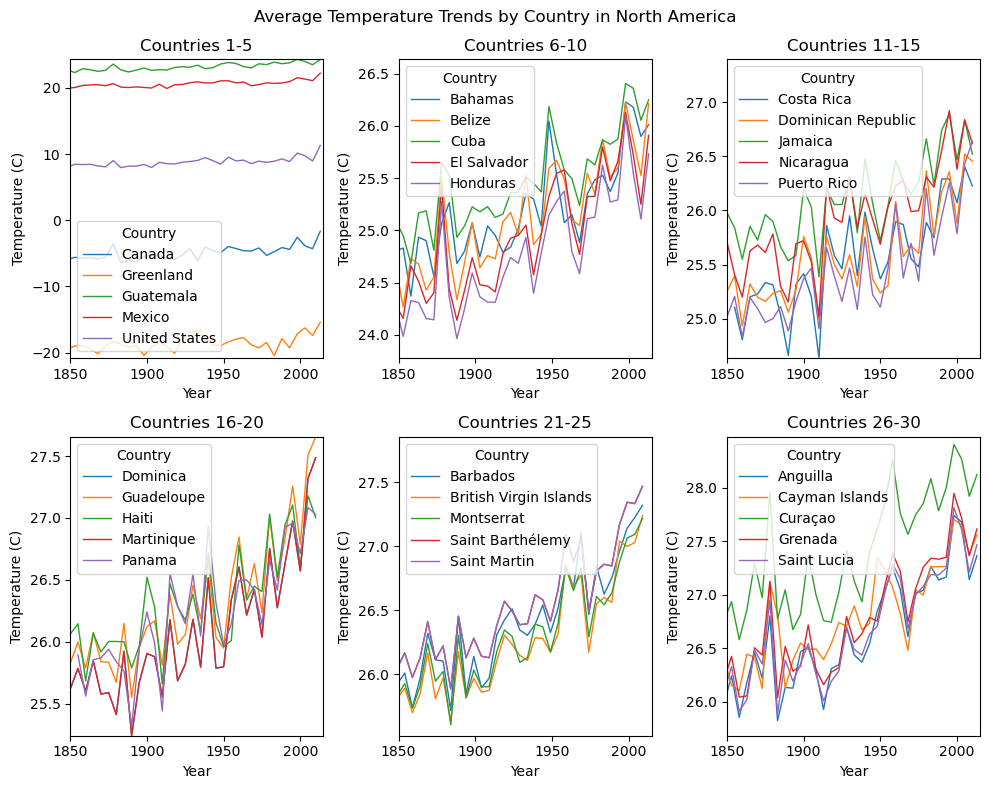

In [50]:
fig, axs = plt.subplots(2, 3, figsize=(10, 8)) 
df = avg_year_country_temp.loc["NA"]
df.reset_index(inplace=True)

plot_function(df, "Average", "North America")

The graph of the hottest month average temperature of countries in North America, based on data collected every five years between 1850 and 2015, shows an overall increase in temperature of around 1 degree Celsius for most countries in the region. However, there are five countries - Costa Rica, El Salvador, Honduras, Panama, and Puerto Rico - that have not exhibited a significant increase in their hottest month average temperature over the past 160 years. This data suggests that there may be certain factors unique to these countries that are buffering them from the global warming trend. Further research is needed to identify these factors and their potential impact on the overall temperature trends in North America. 

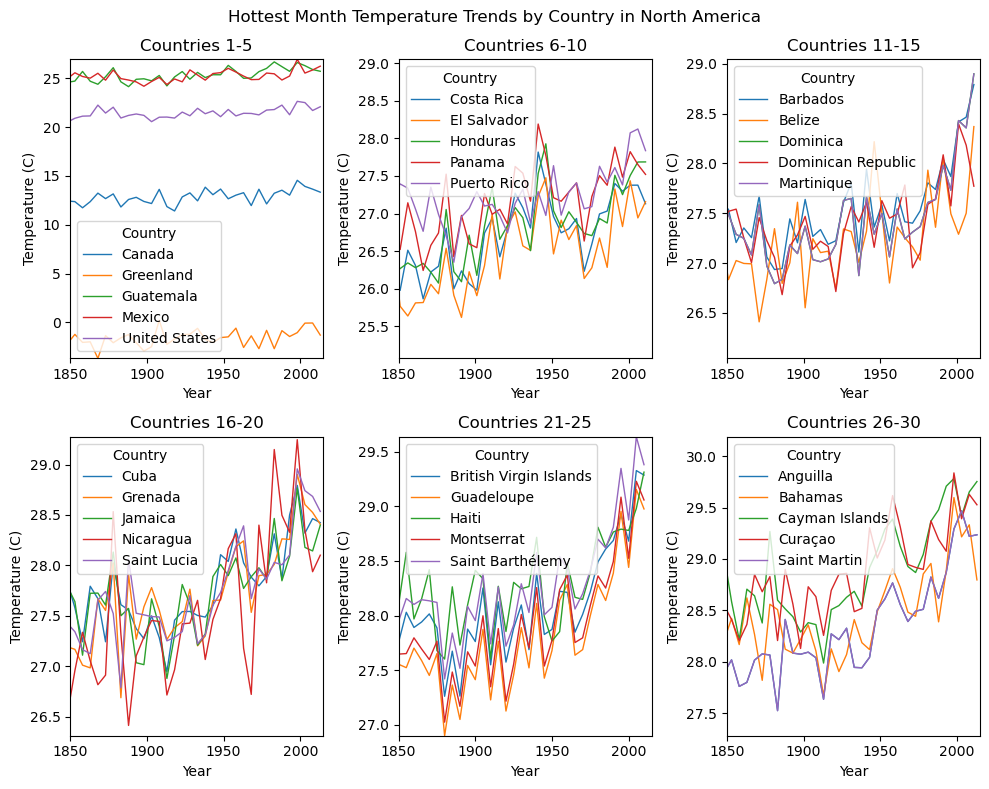

In [51]:
fig, axs = plt.subplots(2, 3, figsize=(10, 8)) 
df = max_year_country_temp.loc["NA"]
df.reset_index(inplace=True)

plot_function(df, "Hottest Month", "North America")

### Avearage and Hottest month temperature trend in South America
The data, collected every five years. The graph showing the average temperature of countries in South America over a period of 165 years, from 1850 to 2015, reveals that the temperature of all countries has increased between 1 to 2 degrees Celsius during this time frame. This indicates a clear and consistent trend of warming in the region over the last century and a half. Additionally, the graph highlights that three countries in particular, French Guiana, Guyana, and Suriname, have experienced an increasing trend in their average temperature over this period, indicating that these countries may be more vulnerable to the impacts of global warming than others in the region. 

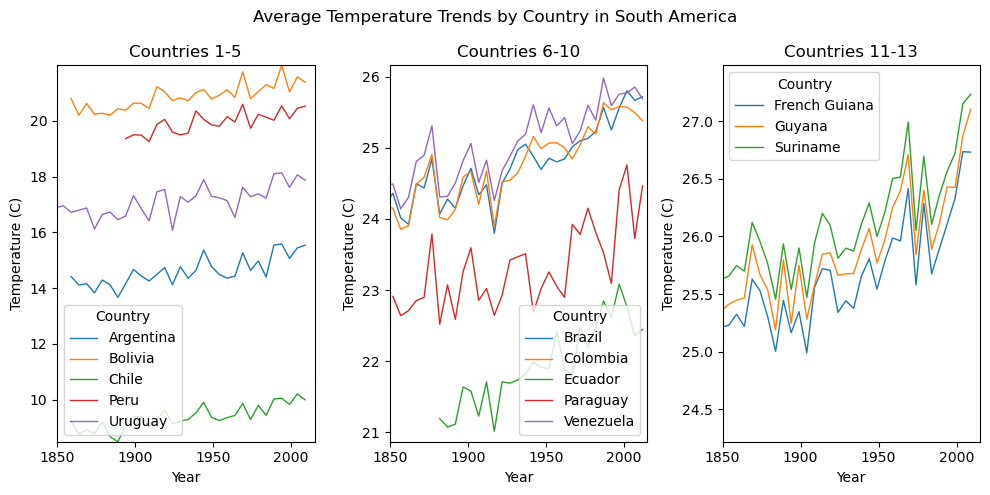

In [52]:
fig, axs = plt.subplots(1, 3, figsize=(10, 5)) 
df = avg_year_country_temp.loc["SA"]
df.reset_index(inplace=True)

plot_function(df, "Average", "South America")

The data, collected every five years. The graph shows the hottest month average temperature of countries in South America from 1850 to 2015. We can observe that all countries in South America have experienced an increase in temperature during this period, with an overall rise of 1-2 degrees Celsius. Interestingly, unlike the average temperature graph, the hottest month average temperature graph shows a consistent upward trend without significant fluctuations. This indicates that the increase in temperature is not limited to a specific period of the year, but rather affects the region throughout the year. These findings align with the global trend of increasing temperatures due to climate change. 

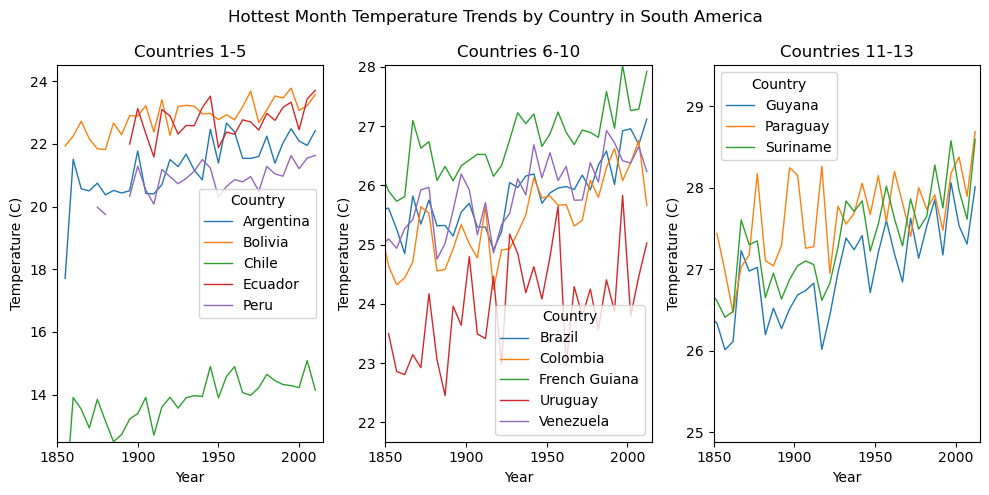

In [53]:
fig, axs = plt.subplots(1, 3, figsize=(10, 5)) 
df = max_year_country_temp.loc["SA"]
df.reset_index(inplace=True)

plot_function(df, "Hottest Month", "South America")

### Avearage and Hottest month temperature trend in Asia
The data, collected every five years. The graph shows the average temperature of countries in Asia from 1850 to 2015. The data reveals that like other continents, all the countries in Asia have experienced an increase in temperature ranging from 1 to 2 degrees Celsius during this time period. However, some countries in Asia, such as Bahrain, Yemen, Cambodia, Oman, Philippines, Qatar, and Singapore, have shown a significant boost in their temperature trends after 1970. This increase may be due to various factors, such as rapid urbanization, industrialization, and increased use of fossil fuels in these countries during this period. 

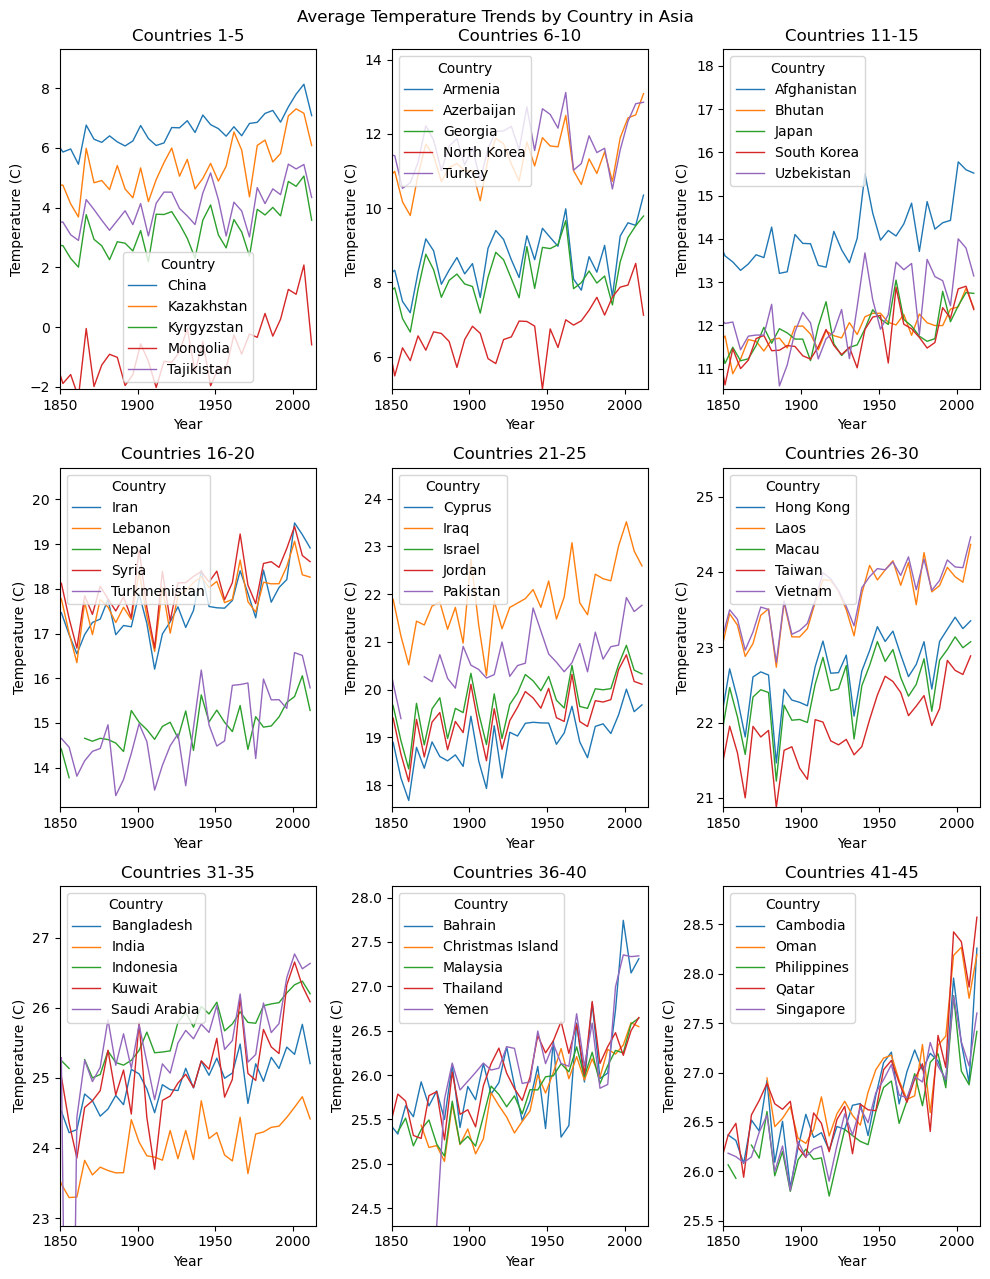

In [54]:
fig, axs = plt.subplots(3, 3, figsize=(10, 13)) 
df = avg_year_country_temp.loc["AS"]
df.reset_index(inplace=True)

plot_function(df, "Average", "Asia")

The data, collected every five years. The graph of hottest month average temperature of countries in Asia shows a different pattern compared to the graph of average temperature. The graph depicts a more fluctuating trend, with many countries showing a marked increase in temperature during the hottest month of the year. The data reveals that most countries in Asia have experienced a significant increase in temperature during their hottest month, with some countries exhibiting more extreme changes than others. 

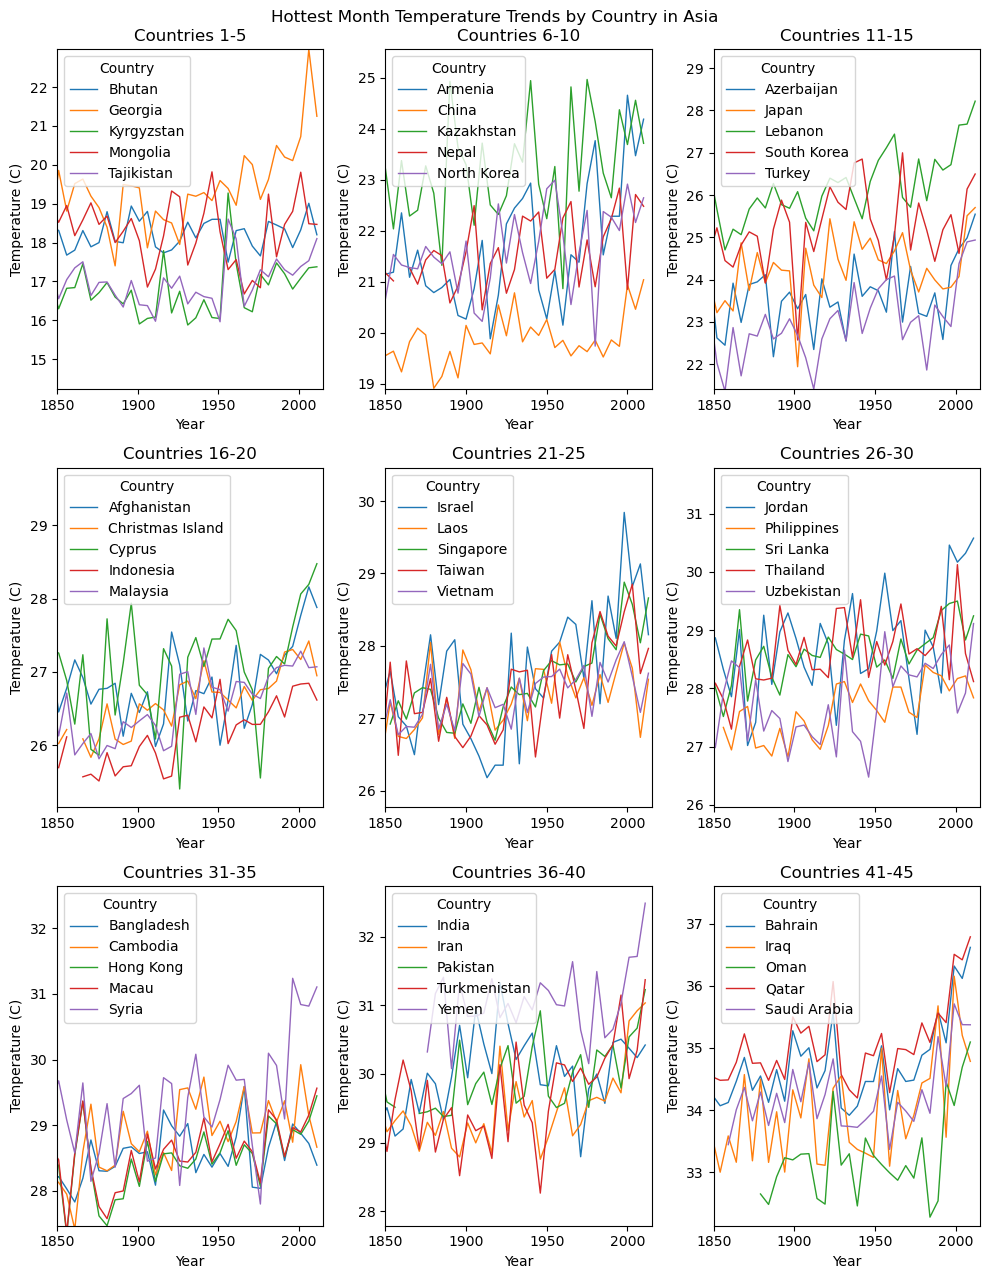

In [55]:
fig, axs = plt.subplots(3, 3, figsize=(10, 13)) 
df = max_year_country_temp.loc["AS"]
df.reset_index(inplace=True)

plot_function(df, "Hottest Month", "Asia")

### Avearage and Hottest month temperature trend in Europe

The data, collected every five years. The graph of the average temperature of countries in Europe indicates that most countries have a relatively lower and more fluctuating temperature overall when compared to other continents such as North America, Asia, and South America. However, it is evident that the majority of European countries have experienced an increase of 1-2 degree Celsius from 1850 to 2015, with most of them showing a continuous upward trend. It is important to note that while the temperature increase is not as significant as in other continents, the fluctuation of temperatures can still have a substantial impact on the environment, ecosystems, and society.

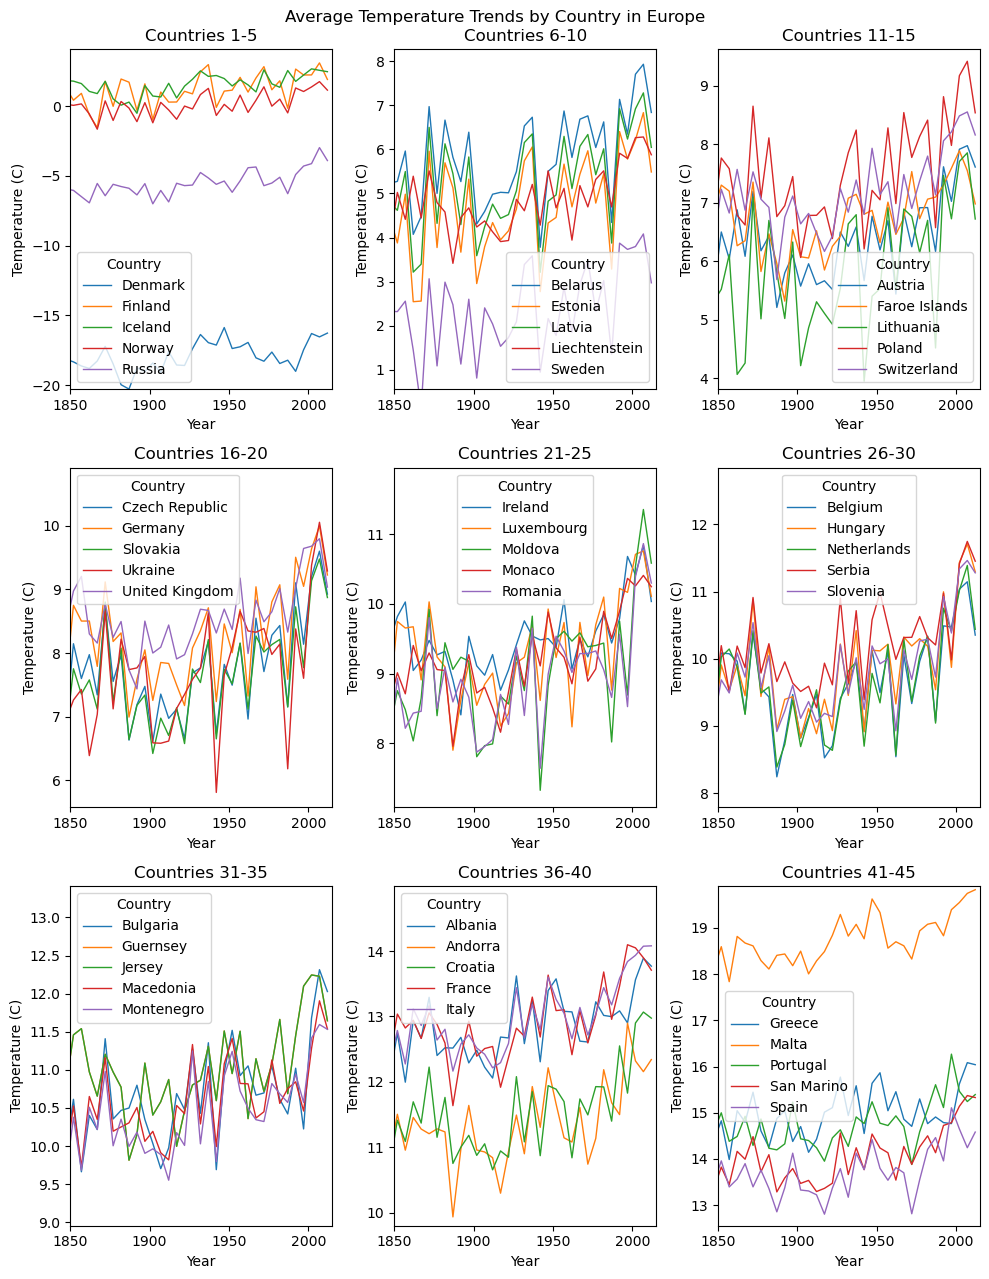

In [56]:
fig, axs = plt.subplots(3, 3, figsize=(10, 13)) 
df = avg_year_country_temp.loc["EU"]
df.reset_index(inplace=True)

plot_function(df, "Average", "Europe")

The data, collected every five years. The graph shows the hottest month average temperature of European countries from 1850 to 2015. Compared to the average yearly temperature, the hottest month temperature has more fluctuations, with some countries showing higher peaks in certain years. Despite the fluctuations, the overall trend shows that most countries in Europe have experienced an increase of 1-2 degree Celsius in their hottest month temperature over the past 165 years. This increase is consistent with the trend observed in the average yearly temperature. Countries such as Germany, France, Italy, Spain, and the United Kingdom have shown a consistent increasing trend in their hottest month temperature, with some of them exhibiting a more rapid increase after the 1970s. 

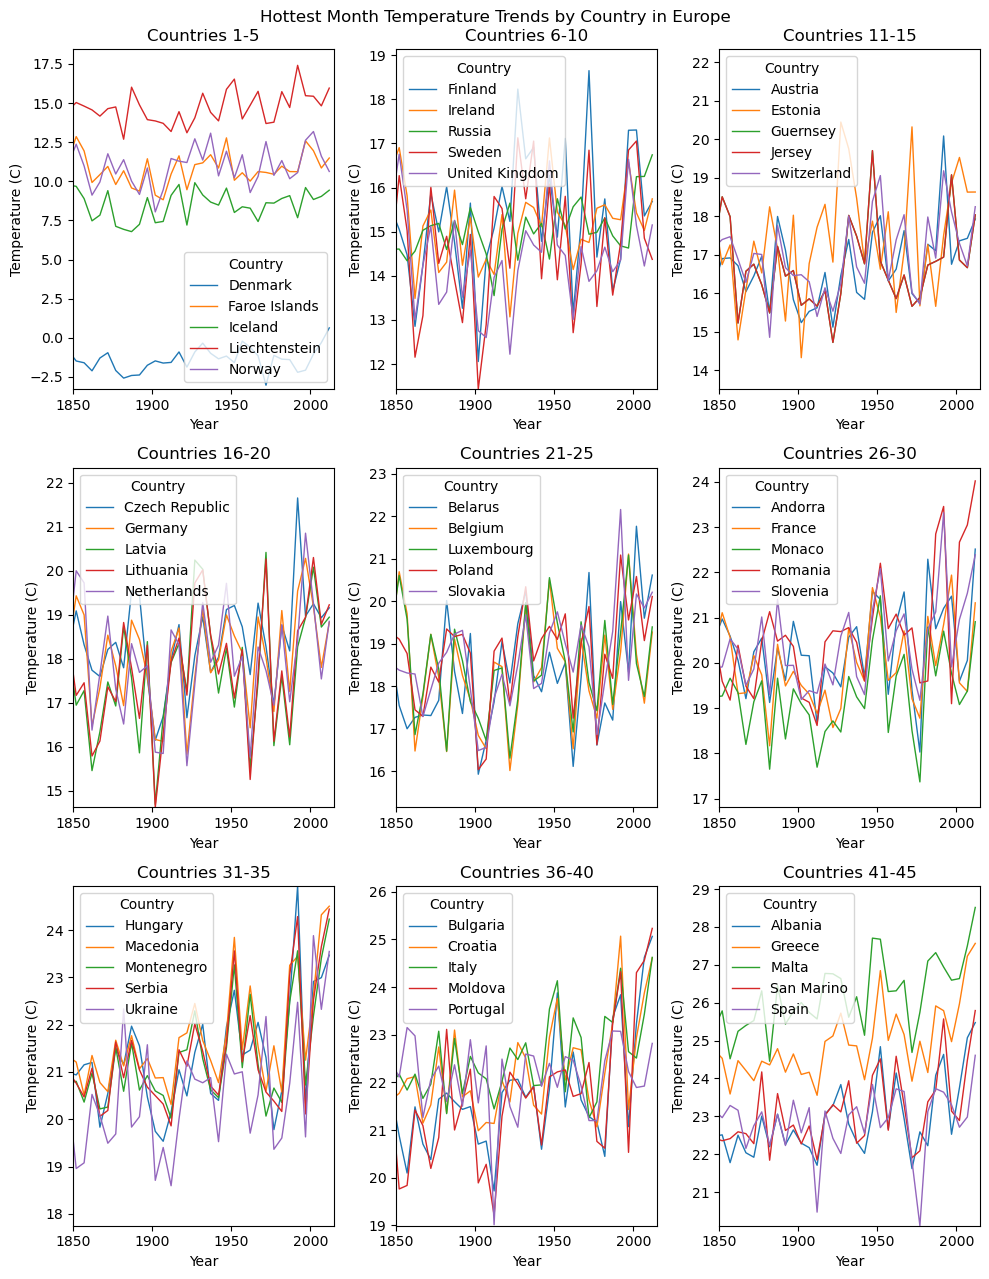

In [57]:
fig, axs = plt.subplots(3, 3, figsize=(10, 13)) 
df = max_year_country_temp.loc["EU"]
df.reset_index(inplace=True)

plot_function(df, "Hottest Month", "Europe")

### Avearage and Hottest monthtemperature trend in Africa

The graph shows the average temperature of countries in Africa every five years from 1850 to 2015. The data indicates that almost all the countries in Africa have experienced an increasing trend in temperature since 1975, with some countries having a steeper rise than others. This trend is consistent with the global warming phenomenon and suggests that Africa is also affected by climate change. Moreover, the graph reveals that the average temperature of all countries in Africa has increased by 1-2 degrees Celsius from 1850 to 2015. 

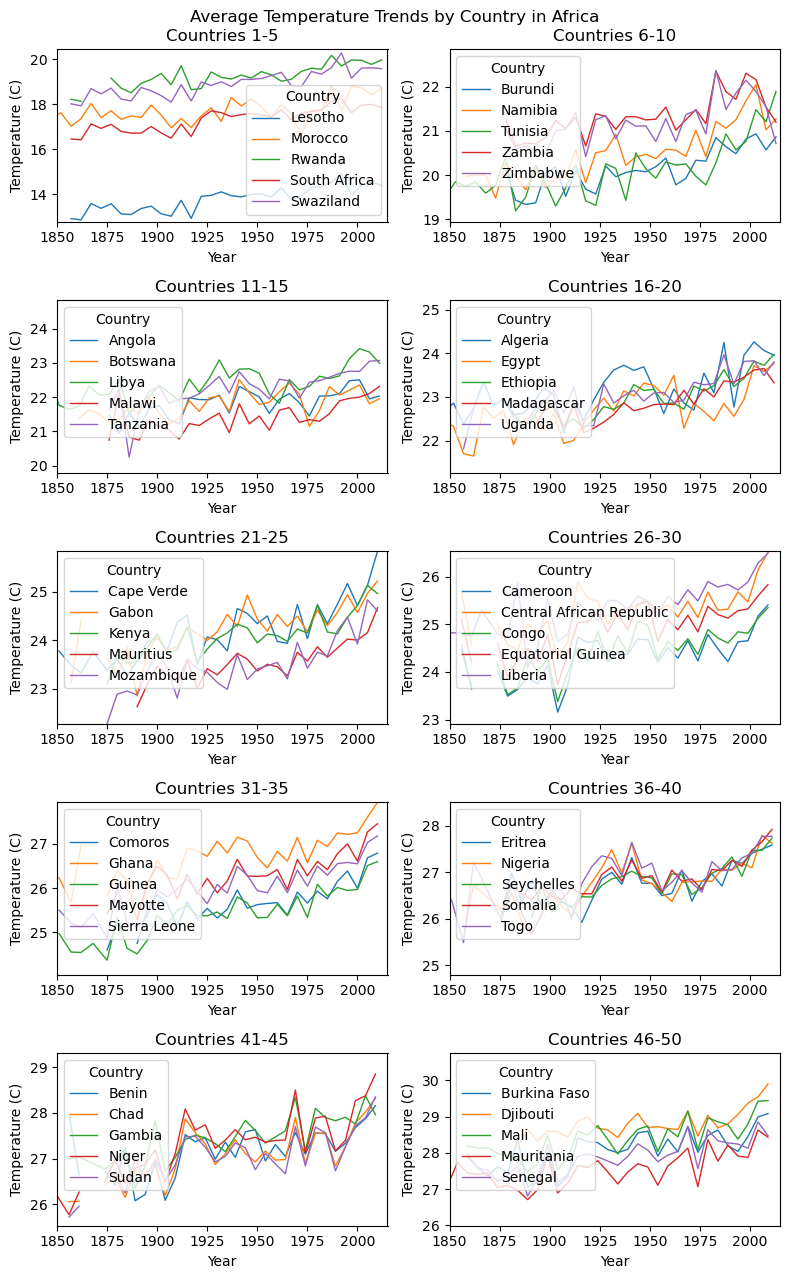

In [58]:
fig, axs = plt.subplots(5, 2, figsize=(8, 13)) 
df = avg_year_country_temp.loc["AF"]
df.reset_index(inplace=True)

plot_function(df, "Average", "Africa")

The graph displaying the hottest month average temperature of countries in Africa, with data points shown every five years, exhibits a similar trend to that of the average yearly temperature. The temperature of almost all the countries in Africa shows a significant increase after 1975. Moreover, the average temperature of all the countries in Africa has increased by approximately 1-2 degree Celsius. Rising temperatures could lead to an increase in droughts, which may have a devastating impact on agriculture and food security, leading to a rise in malnutrition and starvation. Overall, the rise in the hottest month average temperature for most African countries over the last 1.5 century could have a significant impact on the continent's social, economic, and environmental well-being.

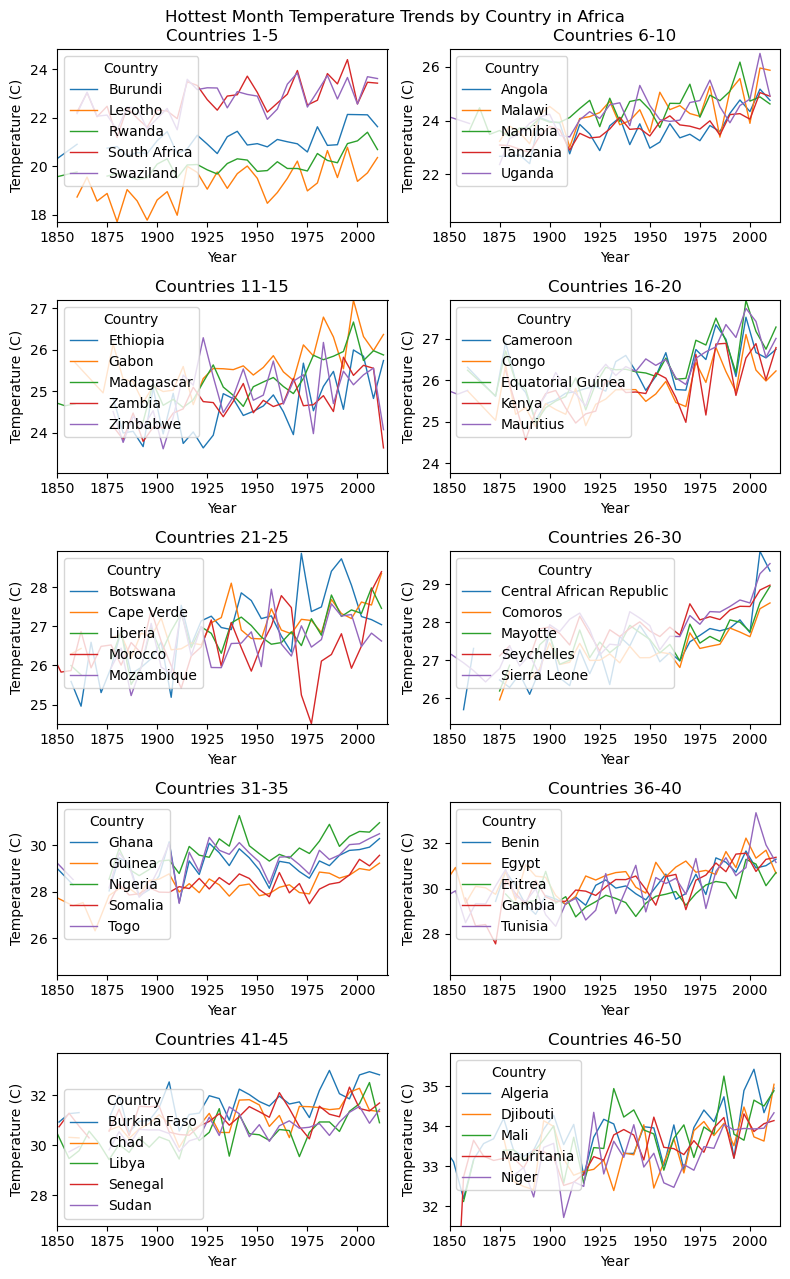

In [59]:
fig, axs = plt.subplots(5, 2, figsize=(8, 13)) 
df = max_year_country_temp.loc["AF"]
df.reset_index(inplace=True)

plot_function(df, "Hottest Month", "Africa")

### Avearage and Hottest month temperature trend in Oceania

The graph represents the average temperature of countries in Oceania, with data points shown every five years. The trend in temperature change is alarming, as almost all the countries show a significant increase in temperature after 1975. The average temperature of all the countries in Oceania has increased by a staggering 2 degree Celsius. This temperature rise is steady and consistent for the past 150 years, indicating a significant warming trend in the region. The Pacific Islands are particularly vulnerable to the impacts of climate change, including rising sea levels and increased frequency of extreme weather events. 

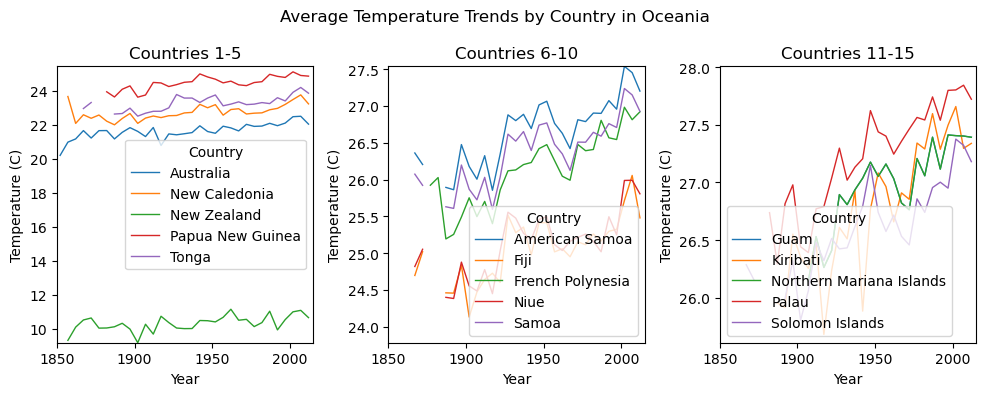

In [60]:
fig, axs = plt.subplots(1, 3, figsize=(10, 4)) 
df = avg_year_country_temp.loc["OC"]
df.reset_index(inplace=True)

plot_function(df, "Average", "Oceania")

The graph displaying the hottest month average temperature of countries in Oceania, with data points shown every five years, shows a significant increase in temperature after 1975. The average temperature of all countries in Oceania has increased by approximately 2 degrees Celsius over the past 1.5 centuries. This increase is steady and has been observed for a long time. The rising temperature in Oceania can be attributed to various factors such as global warming, greenhouse gases, and human activities. 

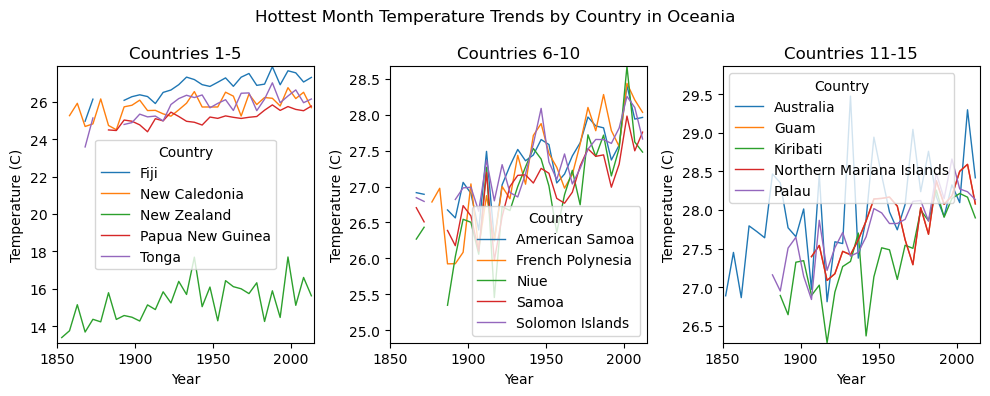

In [61]:
fig, axs = plt.subplots(1, 3, figsize=(10, 4)) 
df = max_year_country_temp.loc["OC"]
df.reset_index(inplace=True)

plot_function(df, "Hottest Month", "Oceania")

In [62]:
no_index_avg = avg_year_country_temp.reset_index()
avg_year_continent_temp = no_index_avg.groupby(["continent", "Year"]).mean().reset_index()
no_index_max = max_year_country_temp.reset_index()
max_year_continent_temp = no_index_max.groupby(["continent", "Year"]).max().reset_index()

In [63]:
pivoted_avg_year_continent = pd.pivot_table(avg_year_continent_temp, values='AverageTemperature', index='Year', columns='continent')
pivoted_max_year_continent = pd.pivot_table(max_year_continent_temp, values='AverageTemperature', index='Year', columns='continent')

### Avearage and Hottest month temperature trend by Continents
The graph displays the average temperature for each continent, calculated by averaging the temperature of all countries within the continent for each year. The data indicates a significant and consistent increase in average temperature across all continents including North America, South America, Asia, Africa, Oceania, and Europe over the past 150 years. The increase is relatively steady. Notably, Europe has been the most fluctuate of all the continents. Moreover, we can observe that all continents have experienced an upward trend in temperature since around 1960. Notably, Europe has been the most fluctuate of all the continents. Moreover, we can observe that all continents have experienced an upward trend in temperature since around 1960. These findings indicate a pressing need to address climate change on a global scale, as the increasing temperatures could have significant ecological and societal impacts.

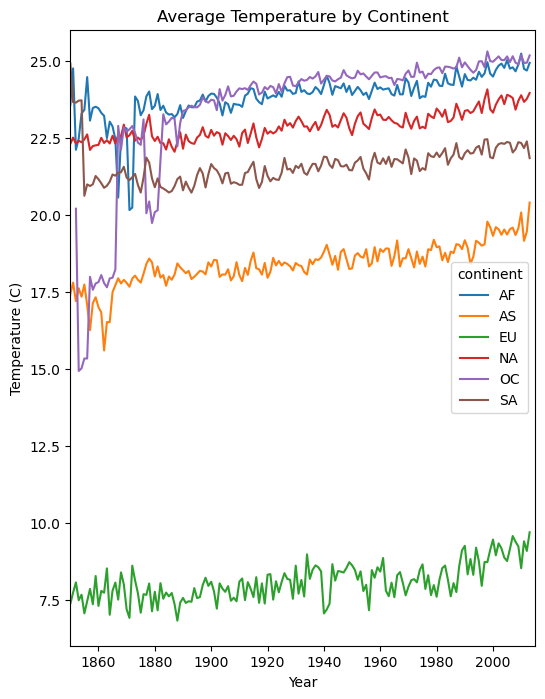

In [64]:
fig, ax = plt.subplots(1, 1, figsize=(6, 8)) 
pivoted_avg_year_continent.plot(ax=ax, kind='line')

# set the title and axis labels
ax.set_title('Average Temperature by Continent')
ax.set_xlabel('Year')
ax.set_ylabel('Temperature (C)')
ax.set_xlim(1850,2015)
ax.set_ylim(6,26)
# show the plot
plt.show()


The graph displays the hottest month average temperature of each continent, where the data is obtained by averaging all the countries' temperatures in that continent in that year. It shows that all the continents, namely North America, South America, Asia, Africa, Oceania, and Europe, have experienced a steady increase in temperature for the past 1.5 centuries. The temperature in Europe is observed to be the most fluctuating among the continents, with significant temperature variations over the years. Additionally, all the continents have shown an increasing trend after 1960, with Asia and Europe demonstrating a significant rise in temperature during this period. This trend is an alarming indication of the ongoing global warming issue and requires immediate action to curb further temperature rise and prevent adverse consequences on the planet's environment and its inhabitants.

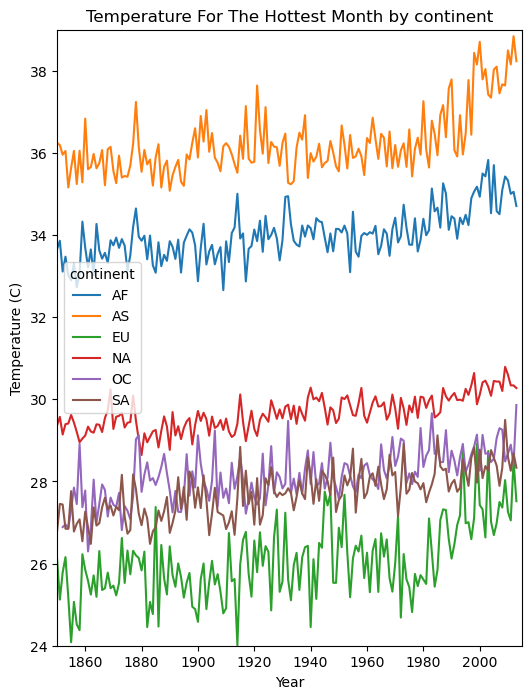

In [65]:
fig, ax = plt.subplots(1, 1, figsize=(6, 8)) 
pivoted_max_year_continent.plot(ax=ax, kind='line')

# set the title and axis labels
ax.set_title('Temperature For The Hottest Month by continent')
ax.set_xlabel('Year')
ax.set_ylabel('Temperature (C)')
ax.set_xlim(1850,2015)
ax.set_ylim(24,39)
# show the plot
plt.show()

### Summary
The analyzed graphs, which display the average and hottest month temperatures of various continents, all point towards a global trend of rising temperatures. In each continent, from North America to South America, Asia, Africa, Oceania, and Europe, there has been a steady increase in temperatures over the past 1.5 centuries. Europe's average temperature, in particular, shows more fluctuations compared to other continents. However, it still displays a clear upward trend, as do all other continents. This trend is particularly evident after 1960, with Asia and Europe experiencing a significant increase in temperature. The overall pattern suggests that global warming trends are indeed occurring globally, and not just in certain areas. These graphs serve as evidence that the Earth's climate is changing and that action needs to be taken to mitigate the negative impacts of rising temperatures.

## 2.2 Maps and Interpretations

In order to understand the extent to which global warming trends are occurring globally, it is important to examine various factors that contribute to climate change. The maps that will be analyzed in the next part of this project provide crucial insights into the impact of human activities on the environment. The average year temperature difference and the hottest month temperature difference between 1850 and 2015 will allow us to examine the long-term trend in temperature changes and how they differ across regions. The average historical carbon emissions of different countries will give us an idea of the contribution of each country to the global carbon footprint. Finally, exploring the electricity generation and fossil fuel usage in 2018 for different countries will help us to understand the current state of affairs and identify areas where immediate action is needed. By considering these various aspects, we will be able to draw a more comprehensive conclusion about the global warming trends occurring across the globe.

### Merging with New Datasets
The new datasets we have chosen, which record carbon emissions from worldbank and energy usage from kaggle for all countries, are crucial to answering the question of whether global warming trends are occurring globally or only in certain areas. Carbon emissions are the main contributor to global warming, and tracking their levels across different countries and regions can help identify the areas where the most significant changes are happening. Moreover, energy usage is closely linked to carbon emissions, as much of the energy we consume comes from burning fossil fuels, which releases carbon dioxide into the atmosphere. By analyzing these datasets, we can gain insights into which countries and regions are the most significant contributors to carbon emissions and how they are using energy, which will help you better understand the global patterns of climate change. Overall, these datasets are critical for understanding the broader picture of climate change and its impact on our planet.

In [66]:
from country_converter import CountryConverter
cc = CountryConverter()

In [67]:
avg_year_country_temp_copy = avg_year_country_temp.reset_index().copy()
avg_year_country_temp_copy['ISO_A3'] = avg_year_country_temp_copy['Country'].apply(lambda x: cc.convert(names=x, to='ISO3') if pd.notnull(x) else None)

max_year_country_temp_copy = max_year_country_temp.reset_index().copy()
max_year_country_temp_copy['ISO_A3'] = max_year_country_temp_copy['Country'].apply(lambda x: cc.convert(names=x, to='ISO3') if pd.notnull(x) else None)

In [68]:
merged_avg_country = avg_year_country_temp_copy.merge(world, left_on='ISO_A3', right_on='iso_a3')
merged_max_country = max_year_country_temp_copy.merge(world, left_on='ISO_A3', right_on='iso_a3')

In [69]:
pivoted_data = merged_avg_country.pivot_table(index='Country', columns='Year', values='AverageTemperature')
temp_diff = pivoted_data[2010] - pivoted_data[1900]
merged_avg_country['TempDiff'] = merged_avg_country['Country'].map(temp_diff)

pivoted_data = merged_max_country.pivot_table(index='Country', columns='Year', values='AverageTemperature')
temp_diff = pivoted_data[2010] - pivoted_data[1900]
merged_max_country['TempDiff'] = merged_avg_country['Country'].map(temp_diff)

In [70]:
file_path = "/Users/nick0o0o0/Library/Mobile Documents/com~apple~CloudDocs/gxyfile/third_year/ECO225/Project_Two/archive/"

carbon_country = pd.read_csv(file_path + "API_EN.ATM.CO2E.PC_DS2_en_csv_v2_4888899.csv")

In [71]:
carbon_country['Max Emission'] = carbon_country.iloc[:, 4:].mean(axis=1)

short_carbon = carbon_country[['Country Code', "Max Emission"]]
merged_carbon = merged_avg_country.merge(short_carbon, left_on="iso_a3", right_on="Country Code")

### Global Maps of Climate Change and Carbon Emissions by Country
The following maps provide visual representations of important climate and environmental data for various countries around the world. The first map shows the average temperature difference between 2010 and 1900 in degrees Celsius, highlighting areas where the greatest increases in temperature have occurred over the past century. The second map displays the difference in temperature for the hottest month between 2010 and 1900, providing insights into how climate change has affected seasonal temperatures in different regions. Finally, the third map presents the average historical carbon emissions per capita by country in metric tons, offering a glimpse into the varying contributions to global carbon emissions across different nations. The annotations on each map highlight specific countries of interest, such as China, Australia, Saudi Arabia, Greenland, America, and Canada, and offer insights into how these countries are impacted by climate change or contribute to global carbon emissions.

The first map shows the average temperature difference between 2010 and 1900 for various countries. It is observed that countries in North America such as Canada and Greenland have experienced a significant temperature change over the years. Similarly, countries in North Africa and West Asia, which are annotated on the map as being around Saudi Arabia, have also experienced a significant temperature change.

However, the second map, which shows the difference in temperature for the hottest month between 2010 and 1900, presents a different trend. It is observed that Europe has been most impacted by the change in temperature, as most areas in the region have experienced a big difference for the hottest month between the two time periods.

The third map shows the average historical carbon emissions per capita by country, which indicates a strong correlation between carbon emissions and average temperature. Interestingly, Canada in North America and the region around Saudi Arabia, in North Africa and West Asia, have both high carbon emissions per capita and significant temperature changes between 1900 and 2010. This suggests that high carbon emissions are contributing to global warming in these regions. Australia, on the other hand, is an outlier, with high carbon emissions per capita but relatively low temperature change and almost no change in the hottest month between 1900 and 2010. This could be due to a variety of factors, such as differences in climate or energy sources. However, it is clear that efforts to reduce carbon emissions need to be implemented globally to address the issue of global warming.

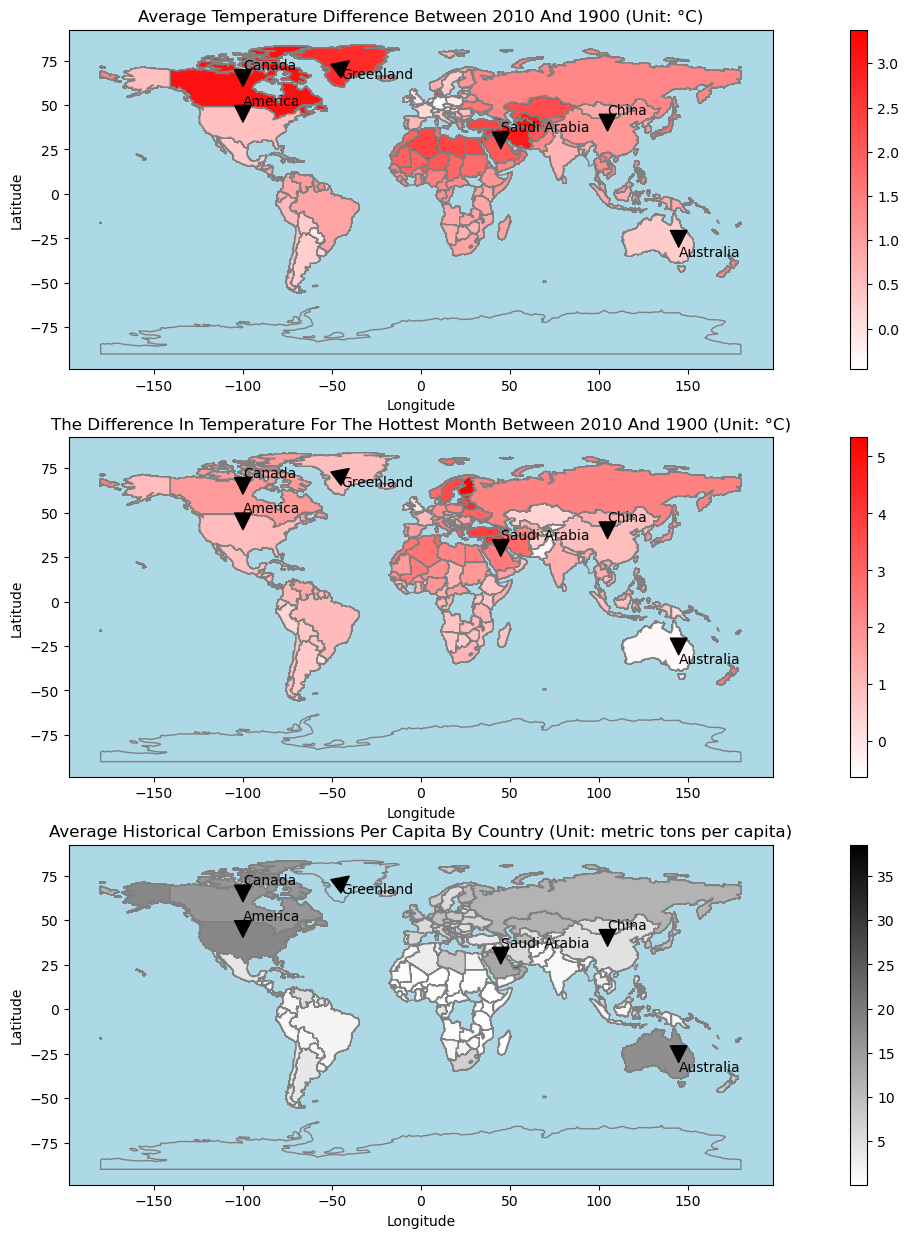

In [72]:
import matplotlib.colors as colors

border_color = 'gray'
cmap1 = colors.LinearSegmentedColormap.from_list('custom', [(1, 1, 1), (1, 0, 0)])
cmap2 = colors.LinearSegmentedColormap.from_list('custom', [(1, 1, 1), (0, 0, 0)])

fig, ax = plt.subplots(3, 1, figsize=(20,15))

for i in range(3):
    world.plot(ax=ax[i], facecolor='none', edgecolor=border_color)
    ax[i].set_facecolor('lightblue')
    
gdf = gpd.GeoDataFrame(merged_avg_country)
gdf.plot(ax=ax[0], column='TempDiff', cmap=cmap1, legend=True, edgecolor=border_color)
ax[0].set_title('Average Temperature Difference Between 2010 And 1900 (Unit: °C)')

gdf = gpd.GeoDataFrame(merged_max_country)
gdf.plot(ax=ax[1], column='TempDiff', cmap=cmap1, legend=True, edgecolor=border_color)
ax[1].set_title('The Difference In Temperature For The Hottest Month Between 2010 And 1900 (Unit: °C)')

gdf = gpd.GeoDataFrame(merged_carbon)
gdf.plot(ax=ax[2], column='Max Emission', cmap=cmap2, legend=True, edgecolor=border_color)
ax[2].set_title('Average Historical Carbon Emissions Per Capita By Country (Unit: metric tons per capita)')

for i in range(3):
    ax[i].set_xlabel('Longitude')
    ax[i].set_ylabel('Latitude')
    ax[i].set_aspect('equal')

for i in range(3):
    ax[i].annotate('China', xy=(105, 35), xytext=(105, 45), fontsize=10,
                arrowprops=dict(facecolor='black', shrink=0.05))
    ax[i].annotate('Australia', xy=(145, -30), xytext=(145, -35), fontsize=10,
                arrowprops=dict(facecolor='black', shrink=0.05))
    ax[i].annotate('Saudi Arabia', xy=(45, 25), xytext=(45, 35), fontsize=10,
                arrowprops=dict(facecolor='black', shrink=0.05))
    ax[i].annotate('Greenland', xy=(-40, 75), xytext=(-45, 65), fontsize=10,
                arrowprops=dict(facecolor='black', shrink=0.05))
    ax[i].annotate('America', xy=(-100, 40), xytext=(-100, 50), fontsize=10,
                arrowprops=dict(facecolor='black', shrink=0.05))
    ax[i].annotate('Canada', xy=(-100, 60), xytext=(-100, 70), fontsize=10,
                arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()

In [73]:
energy_consumption = pd.read_csv(file_path + 'World Energy Consumption.csv')

In [74]:
energy_consumption2018 = energy_consumption.set_index('year').loc[2018]

### Comparing Electricity Generation, Fossil Fuel Consumption in 2018
The following maps illustrate the global distribution of electricity generation and fossil fuel consumption in 2018, measured in terawatt-hours (TWh). The maps display data for each country, with darker shades indicating higher levels of electricity generation or fossil fuel consumption. Based on the given maps, we can observe that there is a high correlation between fossil fuel consumption and electricity generation. The countries that have a higher electricity generation rate also tend to have a higher consumption rate of fossil fuels. This indicate that most countries use the fossil fuel as a big portion to generate electriciy. The data reveals that China leads the world in both categories, followed by the United States. Surprisingly, despite being the biggest electricity producer and fossil fuel consumer, China does not have the highest carbon emissions per capita, which may be due to its large population bringing down the average. The United States is also a significant contributor to global electricity generation and fossil fuel consumption, yet both countries have experienced relatively smaller temperature changes compared to other countries. This suggests that high electricity generation and fossil fuel consumption alone do not necessarily translate to significant temperature changes.

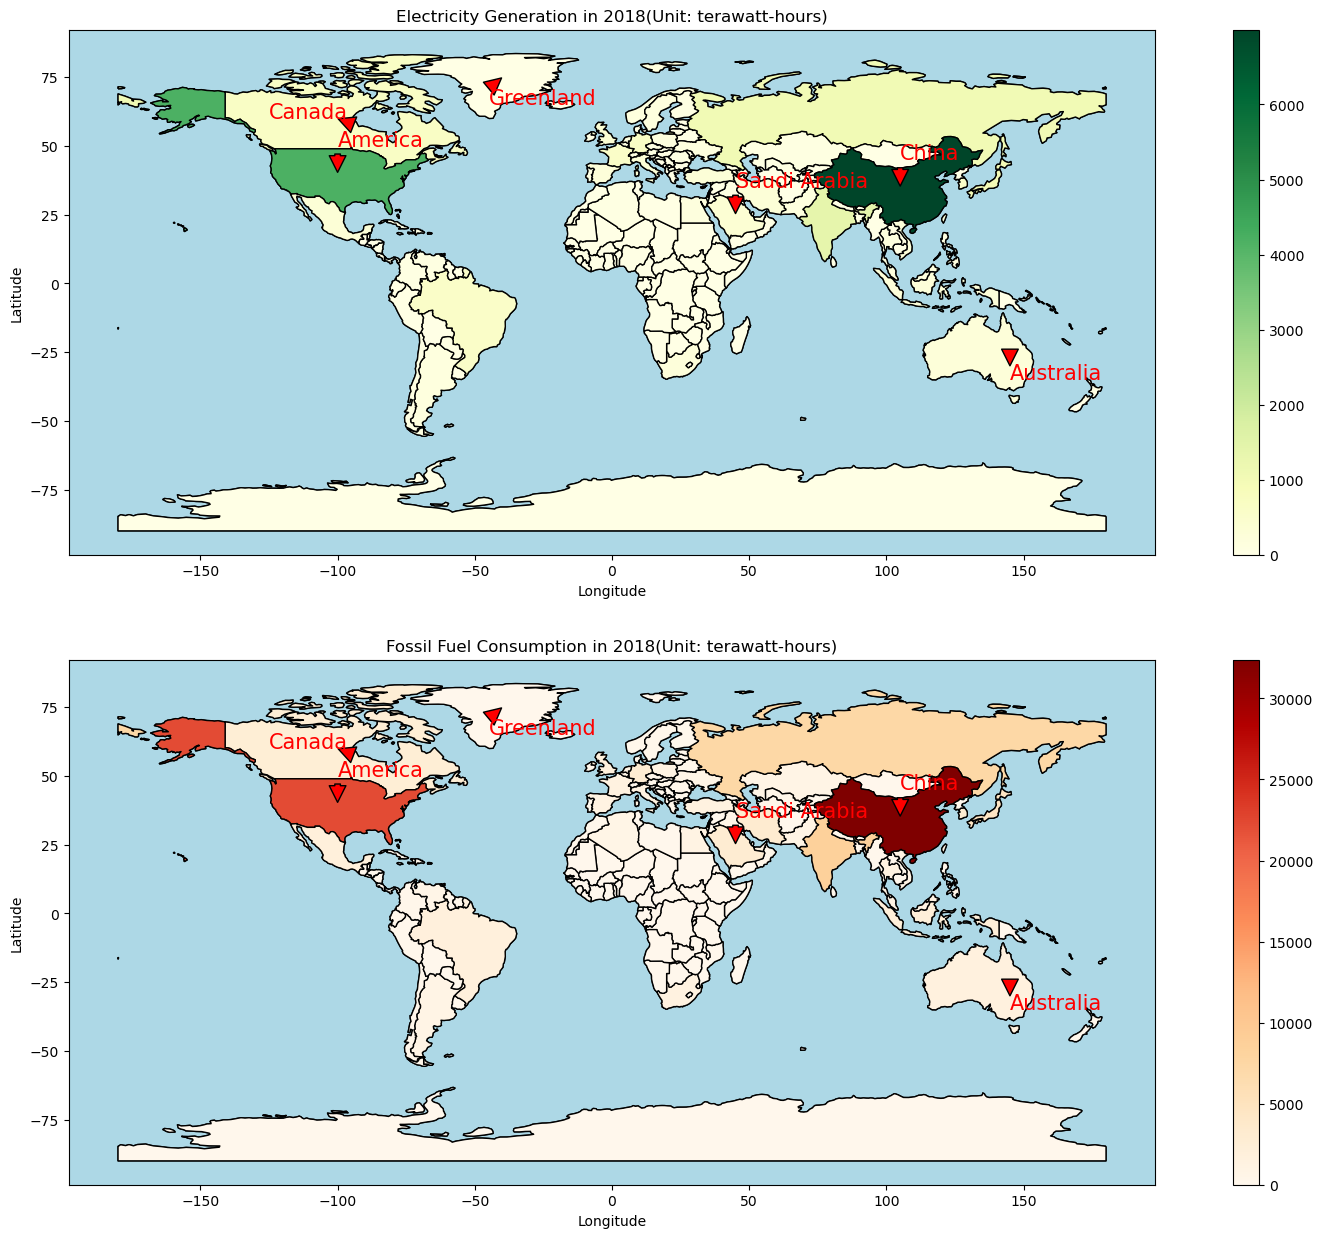

In [78]:
merged = world.merge(energy_consumption2018[['iso_code', 'electricity_generation', 'fossil_fuel_consumption']], 
                     left_on='iso_a3', right_on='iso_code', how='left').fillna(0)

fig, axs = plt.subplots(2, 1, figsize=(20,15))

for i in range(2):
    axs[i].set_facecolor('lightblue')
    axs[i].set_xlabel('Longitude')
    axs[i].set_ylabel('Latitude')
    axs[i].set_aspect('equal')
    
world.plot(ax=axs[0], facecolor='none')
world.plot(ax=axs[1], facecolor='none')

    
merged.plot(column='electricity_generation', cmap='YlGn', legend=True, ax=axs[0], edgecolor='black')
axs[0].set_title('Electricity Generation in 2018(Unit: terawatt-hours)')

merged.plot(column='fossil_fuel_consumption', cmap='OrRd', legend=True, ax=axs[1], edgecolor='black')
axs[1].set_title('Fossil Fuel Consumption in 2018(Unit: terawatt-hours)')

for i in range(2):
    axs[i].annotate('China', xy=(105, 35), xytext=(105, 45), fontsize=15,
                arrowprops=dict(facecolor='red', shrink=0.05), color='Red')
    axs[i].annotate('Australia', xy=(145, -30), xytext=(145, -35), fontsize=15,
                arrowprops=dict(facecolor='red', shrink=0.05), color='Red')
    axs[i].annotate('Saudi Arabia', xy=(45, 25), xytext=(45, 35), fontsize=15,
                arrowprops=dict(facecolor='red', shrink=0.05), color='Red')
    axs[i].annotate('Greenland', xy=(-40, 75), xytext=(-45, 65), fontsize=15,
                arrowprops=dict(facecolor='red', shrink=0.05), color='Red')
    axs[i].annotate('America', xy=(-100, 40), xytext=(-100, 50), fontsize=15,
                arrowprops=dict(facecolor='red', shrink=0.05), color='Red')
    axs[i].annotate('Canada', xy=(-100, 60), xytext=(-125, 60), fontsize=15,
                arrowprops=dict(facecolor='red', shrink=0.05), color='Red')


plt.show()

### Electricity Generation and Fossil Fuel Consumption per capita in 2018 around the world
The two maps generated by the code above depict the per capita electricity generation and fossil fuel consumption of countries worldwide in 2018. The maps provide valuable insights into the relationship between the two factors and their implications on global warming.

One observation from the maps is that countries with higher electricity generation per capita tend to have higher fossil fuel consumption per capita. This finding highlights the high correlation between electricity generation and fossil fuel consumption, which is not surprising given that most countries rely heavily on fossil fuels to generate electricity.

Another interesting finding is that China, despite being the highest electricity generator, is not the highest fossil fuel consumer per capita. Other countries such as Australia, Canada, USA, and Saudi Arabia have higher fossil fuel consumption per capita than China.

Moreover, the fossil fuel consumption per capita map is highly consistent with the carbon emission per capita map, indicating that fossil fuel consumption is the main factor contributing to carbon emissions and global warming. The consistency between the two maps also suggests that reducing fossil fuel consumption is an effective way to combat climate change.

In addition, the fossil fuel consumption per capita map correlates highly with the hottest month temperature change map. This correlation provides evidence that fossil fuel consumption is the primary factor driving global warming, as the burning of fossil fuels releases greenhouse gases into the atmosphere, leading to rising temperatures and other climate-related changes.

Overall, the maps generated by the code below provide valuable insights into the relationship between electricity generation, fossil fuel consumption, and global warming. The findings highlight the need to reduce our reliance on fossil fuels and transition to cleaner sources of energy to combat climate change.

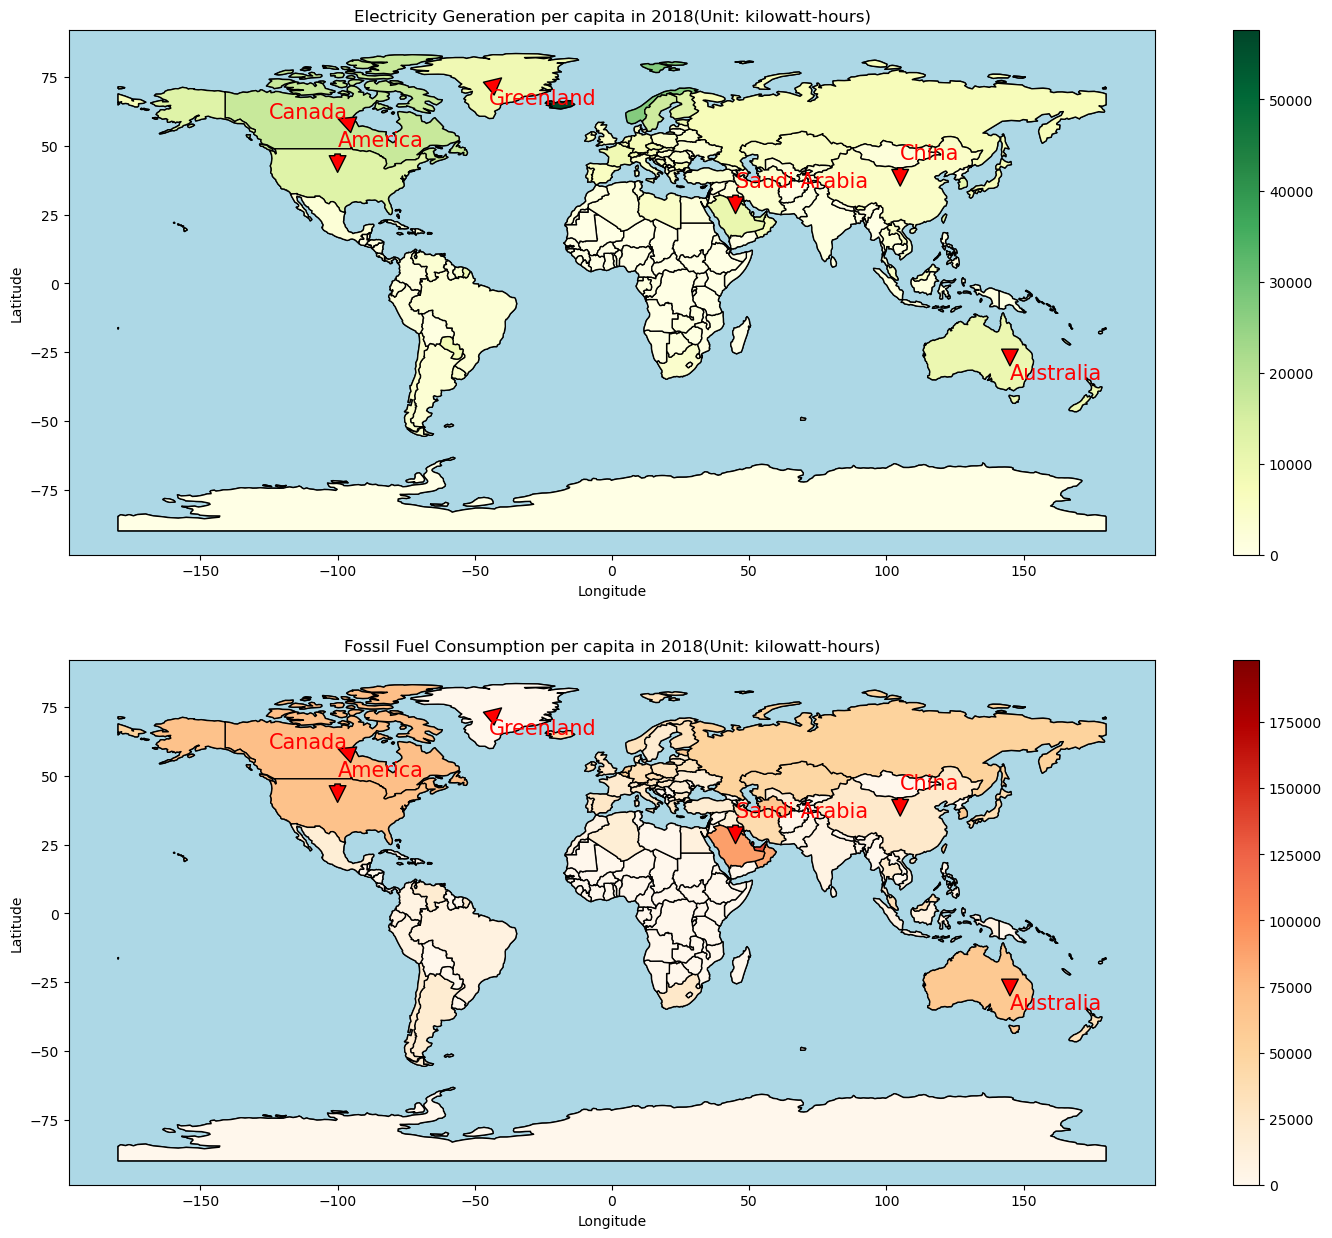

In [77]:
merged = world.merge(energy_consumption2018[['iso_code', 'per_capita_electricity', 'fossil_energy_per_capita']], 
                     left_on='iso_a3', right_on='iso_code', how='left').fillna(0)

fig, axs = plt.subplots(2, 1, figsize=(20,15))
for i in range(2):
    axs[i].set_facecolor('lightblue')
    axs[i].set_xlabel('Longitude')
    axs[i].set_ylabel('Latitude')
    axs[i].set_aspect('equal')
    
world.plot(ax=axs[0], facecolor='none')
world.plot(ax=axs[1], facecolor='none')

merged.plot(column='per_capita_electricity', cmap='YlGn', legend=True, ax=axs[0], edgecolor='black')
axs[0].set_title('Electricity Generation per capita in 2018(Unit: kilowatt-hours)')

merged.plot(column='fossil_energy_per_capita', cmap='OrRd', legend=True, ax=axs[1], edgecolor='black')
axs[1].set_title('Fossil Fuel Consumption per capita in 2018(Unit: kilowatt-hours)')

for i in range(2):
    axs[i].annotate('China', xy=(105, 35), xytext=(105, 45), fontsize=15,
                arrowprops=dict(facecolor='red', shrink=0.05), color='Red')
    axs[i].annotate('Australia', xy=(145, -30), xytext=(145, -35), fontsize=15,
                arrowprops=dict(facecolor='red', shrink=0.05), color='Red')
    axs[i].annotate('Saudi Arabia', xy=(45, 25), xytext=(45, 35), fontsize=15,
                arrowprops=dict(facecolor='red', shrink=0.05), color='Red')
    axs[i].annotate('Greenland', xy=(-40, 75), xytext=(-45, 65), fontsize=15,
                arrowprops=dict(facecolor='red', shrink=0.05), color='Red')
    axs[i].annotate('America', xy=(-100, 40), xytext=(-100, 50), fontsize=15,
                arrowprops=dict(facecolor='red', shrink=0.05), color='Red')
    axs[i].annotate('Canada', xy=(-100, 60), xytext=(-125, 60), fontsize=15,
                arrowprops=dict(facecolor='red', shrink=0.05), color='Red')

plt.show()

## 2.4 Conclusion
In conclusion, the analysis of the temperature dataset provides compelling evidence that global warming is a real phenomenon. The increase in average and maximum temperatures, coupled with a decrease in temperature difference, indicates a shift towards a more stable climate. While the standard deviation of temperature remains relatively stable, the observed increase in frequency of high temperatures suggests a trend towards a warmer climate across the globe.Furthermore, the analysis of average and hottest month temperatures across various continents reveals a clear and consistent upward trend. From North America to South America, Asia, Africa, Oceania, and Europe, all continents have experienced a steady increase in temperatures over the past 1.5 centuries. This trend is particularly evident after 1960, with Asia and Europe experiencing a significant increase in temperature.

The Analysis of the maps generated from the energy consumption data for 2018 has revealed some interesting findings. The two maps, per capita electricity generation and per capita fossil fuel consumption, are highly correlated, indicating that countries with high electricity generation also tend to have high fossil fuel consumption. The evidence strongly suggests that fossil fuel consumption is the primary factor contributing to global warming, and its effects are not limited to certain areas but are occurring globally. The consistency of the per capita fossil fuel consumption map with the per capita carbon emission and temperature change maps further supports this conclusion.

The findings of this project highlight the need for urgent action to address the issue of global warming. Reducing fossil fuel consumption and transitioning to cleaner sources of energy is necessary to mitigate the impact of global warming on the environment, economy, and society. Therefore, it is evident that global warming trends are occurring globally and not limited to certain areas. The effects of fossil fuel consumption on the environment are widespread, and urgent action is required to prevent further damage to the planet.

## 6. Citation
Berkeley Earth. (n.d.). Climate Change: Earth Surface Temperature Data [Dataset]. Kaggle. Retrieved from https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data


https://data.worldbank.org/indicator/EN.ATM.CO2E.PC

https://www.kaggle.com/datasets/pralabhpoudel/world-energy-consumption